# QuakeAI Fusion: Exploring Time Series Dynamics, Magnitude Forecasting, Clustering, Anomaly Detection, and Generative AI for Seismic Event Insight

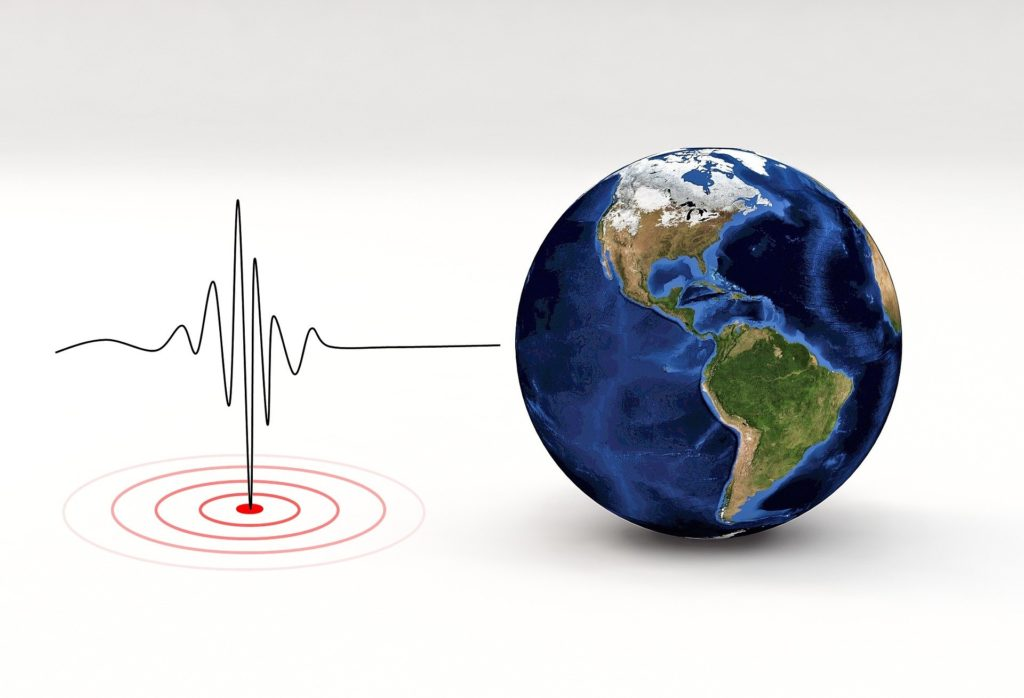

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("earthquake.csv")

In [4]:
df.head()

latitude  longitude   depth   mag          id  hour        date
0  34.189835 -117.58800   6.000  1.70  ci12317071     0  01-01-1973
1  -9.214000  150.63400  41.000  5.30  usp0000001     3  01-01-1973
2  48.308666 -122.11733  13.680  2.20  uw10840118     4  01-01-1973
3 -15.012000 -173.95800  33.000  5.00  usp0000002     5  01-01-1973
4  19.443666 -155.36084   7.302  1.85  hv19723167     7  01-01-1973

In [5]:
df.tail()

latitude   longitude    depth   mag          id  hour        date
1048570  35.406666 -120.972000    4.996  2.16    nc532631    15  08-11-1997
1048571 -29.489000 -179.065000  300.000  3.90  usp0008aa5    15  08-11-1997
1048572  37.631332 -118.846664    2.856  1.27  nc40040721    15  08-11-1997
1048573  37.650333 -118.854330    2.536  0.94  nc40040720    15  08-11-1997
1048574  44.086000    7.943000   10.000  2.20  usp0008aa4    15  08-11-1997

In [6]:
df.shape

(1048575, 7)

In [7]:
df.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'id', 'hour', 'date'], dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

latitude     0
longitude    0
depth        0
mag          0
id           0
hour         0
date         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   latitude   1048575 non-null  float64
 1   longitude  1048575 non-null  float64
 2   depth      1048575 non-null  float64
 3   mag        1048575 non-null  float64
 4   id         1048575 non-null  object 
 5   hour       1048575 non-null  int64  
 6   date       1048575 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 56.0+ MB


In [11]:
df.describe()

latitude     longitude         depth           mag          hour
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06
mean   3.290551e+01 -9.292454e+01  1.912356e+01  2.087926e+00  1.134486e+01
std    1.696636e+01  7.803025e+01  5.437885e+01  1.286230e+00  6.855554e+00
min   -8.206400e+01 -1.799990e+02  0.000000e+00 -9.990000e+00  0.000000e+00
25%    3.355408e+01 -1.222340e+02  3.339000e+00  1.190000e+00  5.000000e+00
50%    3.655767e+01 -1.187110e+02  6.348000e+00  1.730000e+00  1.100000e+01
75%    3.880967e+01 -1.161300e+02  1.139600e+01  2.570000e+00  1.700000e+01
max    8.722100e+01  1.800000e+02  7.000000e+02  8.310000e+00  2.300000e+01

In [12]:
df = df.drop('id', axis = 1)

In [13]:
df['date'] = pd.to_datetime(df['date'])

latitude: Angular measurement of a location's distance north or south of the equator, which ranges from -90° (South) to +90° (North).

longitude: Angular measurement of a location's distance east or west of the prime meridian, which ranges from -180° to +180°.

depth: Represents the depth of the earthquake's focus below the surface of the earth. It's typically measured in kilometers and is non-negative.

mag: Magnitude of the earthquake, which is a measure of its size. Magnitude is non-negative.

hour: Represents the hour of the day and is usually in the range 0-23.

In [14]:
df['depth'] = df['depth'].abs()
df['mag'] = df['mag'].abs()
df['hour'] = df['hour'].abs()

In [15]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [16]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

In [17]:
df['day_of_week'] = df['date'].dt.dayofweek

In [18]:
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [19]:
mean_latitude = df['latitude'].mean()
mean_longitude = df['longitude'].mean()

In [20]:
median_latitude = df['latitude'].median()
median_longitude = df['longitude'].median()

In [21]:
if abs(median_latitude - mean_latitude) < abs(median_longitude - mean_longitude):
    # If difference in latitude is smaller, use mean latitude
    reference_latitude = mean_latitude
    reference_longitude = mean_longitude
else:
    # If difference in longitude is smaller, use mean longitude
    reference_latitude = median_latitude
    reference_longitude = median_longitude

print("Chosen Reference Latitude:", reference_latitude)
print("Chosen Reference Longitude:", reference_longitude)

Chosen Reference Latitude: 32.90551062618124
Chosen Reference Longitude: -92.92454220924783


In [22]:
df['distance_from_epicenter'] = np.sqrt((df['latitude'] - reference_latitude)**2 + (df['longitude'] - reference_longitude)**2)

In [23]:
df['day_of_year'] = df['date'].dt.dayofyear

In [24]:
df['magnitude_category'] = pd.cut(df['mag'], bins=[0, 5.0, 7.0, np.inf], labels=['small', 'medium', 'large'], include_lowest=True)

In [25]:
df.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'hour', 'date', 'day', 'month',
       'year', 'season', 'day_of_week', 'is_weekend',
       'distance_from_epicenter', 'day_of_year', 'magnitude_category'],
      dtype='object')

In [26]:
df

latitude   longitude    depth   mag  hour       date  day  month  \
0        34.189835 -117.588000    6.000  1.70     0 1973-01-01    1      1   
1        -9.214000  150.634000   41.000  5.30     3 1973-01-01    1      1   
2        48.308666 -122.117330   13.680  2.20     4 1973-01-01    1      1   
3       -15.012000 -173.958000   33.000  5.00     5 1973-01-01    1      1   
4        19.443666 -155.360840    7.302  1.85     7 1973-01-01    1      1   
...            ...         ...      ...   ...   ...        ...  ...    ...   
1048570  35.406666 -120.972000    4.996  2.16    15 1997-08-11   11      8   
1048571 -29.489000 -179.065000  300.000  3.90    15 1997-08-11   11      8   
1048572  37.631332 -118.846664    2.856  1.27    15 1997-08-11   11      8   
1048573  37.650333 -118.854330    2.536  0.94    15 1997-08-11   11      8   
1048574  44.086000    7.943000   10.000  2.20    15 1997-08-11   11      8   

         year  season  day_of_week  is_weekend  distance_from_epicenter  \
0        1973  Winter            0           0                24.696875   
1        1973  Winter            0           0               247.173657   
2        1973  Winter            0           0                33.007212   
3        1973  Winter            0           0                94.140900   
4        1973  Winter            0           0                63.871062   
...       ...     ...          ...         ...                      ...   
1048570  1997  Summer            0           0                28.158758   
1048571  1997  Summer            0           0               106.363779   
1048572  1997  Summer            0           0                26.349379   
1048573  1997  Summer            0           0                26.360334   
1048574  1997  Summer            0           0               101.485292   

         day_of_year magnitude_category  
0                  1              small  
1                  1             medium  
2                  1              small  
3                  1              small  
4                  1              small  
...              ...                ...  
1048570          223              small  
1048571          223              small  
1048572          223              small  
1048573          223              small  
1048574          223              small  

[1048575 rows x 15 columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   latitude                 1048575 non-null  float64       
 1   longitude                1048575 non-null  float64       
 2   depth                    1048575 non-null  float64       
 3   mag                      1048575 non-null  float64       
 4   hour                     1048575 non-null  int64         
 5   date                     1048575 non-null  datetime64[ns]
 6   day                      1048575 non-null  int64         
 7   month                    1048575 non-null  int64         
 8   year                     1048575 non-null  int64         
 9   season                   1048575 non-null  object        
 10  day_of_week              1048575 non-null  int64         
 11  is_weekend               1048575 non-null  int64         
 12  

In [28]:
df.describe()

latitude     longitude         depth           mag          hour  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   3.290551e+01 -9.292454e+01  1.912356e+01  2.091813e+00  1.134486e+01   
std    1.696636e+01  7.803025e+01  5.437885e+01  1.279899e+00  6.855554e+00   
min   -8.206400e+01 -1.799990e+02  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.355408e+01 -1.222340e+02  3.339000e+00  1.190000e+00  5.000000e+00   
50%    3.655767e+01 -1.187110e+02  6.348000e+00  1.730000e+00  1.100000e+01   
75%    3.880967e+01 -1.161300e+02  1.139600e+01  2.580000e+00  1.700000e+01   
max    8.722100e+01  1.800000e+02  7.000000e+02  9.990000e+00  2.300000e+01   

                day         month          year   day_of_week    is_weekend  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.582330e+01  6.524468e+00  1.988176e+03  3.011111e+00  2.895139e-01   
std    8.815723e+00  3.425199e+00  6.232183e+00  2.006293e+00  4.535370e-01   
min    1.000000e+00  1.000000e+00  1.973000e+03  0.000000e+00  0.000000e+00   
25%    8.000000e+00  4.000000e+00  1.984000e+03  1.000000e+00  0.000000e+00   
50%    1.600000e+01  7.000000e+00  1.989000e+03  3.000000e+00  0.000000e+00   
75%    2.400000e+01  9.000000e+00  1.993000e+03  5.000000e+00  1.000000e+00   
max    3.100000e+01  1.200000e+01  1.997000e+03  6.000000e+00  1.000000e+00   

       distance_from_epicenter   day_of_year  
count             1.048575e+06  1.048575e+06  
mean              5.488624e+01  1.832814e+02  
std               5.800064e+01  1.048241e+02  
min               2.026308e-01  1.000000e+00  
25%               2.511160e+01  9.200000e+01  
50%               2.892650e+01  1.860000e+02  
75%               6.376223e+01  2.740000e+02  
max               2.900740e+02  3.660000e+02

In [29]:
df.nunique()

latitude                   166490
longitude                  220707
depth                       36711
mag                           600
hour                           24
date                         9078
day                            31
month                          12
year                           25
season                          4
day_of_week                     7
is_weekend                      2
distance_from_epicenter    961648
day_of_year                   366
magnitude_category              3
dtype: int64

In [30]:
discrete_categorical_columns = ['hour', 'day', 'month', 'year', 'season', 
                    'day_of_week', 'is_weekend', 'day_of_year', 'magnitude_category']

In [31]:
count_data = {
    'hour': df['hour'].value_counts(),
    'day': df['day'].value_counts(),
    'month': df['month'].value_counts(),
    'year': df['year'].value_counts(),
    'season': df['season'].value_counts(),
    'day_of_week': df['day_of_week'].value_counts(),
    'is_weekend': df['is_weekend'].value_counts(),
    'day_of_year': df['day_of_year'].value_counts(),
    'magnitude_category': df['magnitude_category'].value_counts()
}

In [32]:
for column, counts in count_data.items():
    fig = px.bar(
        x=counts.index,
        y=counts.values,
        labels={'x': column, 'y': 'Count'},
        title=f'Count Plot for {column}',
    )
    fig.show()

In [33]:
for column, counts in count_data.items():
    fig = px.pie(
        counts,
        names=counts.index,
        values=counts.values,
        title=f'Pie Plot for {column}',
    )
    fig.show()

In [34]:
continuous_columns = ['latitude', 'longitude', 'depth', 'mag', 'distance_from_epicenter']

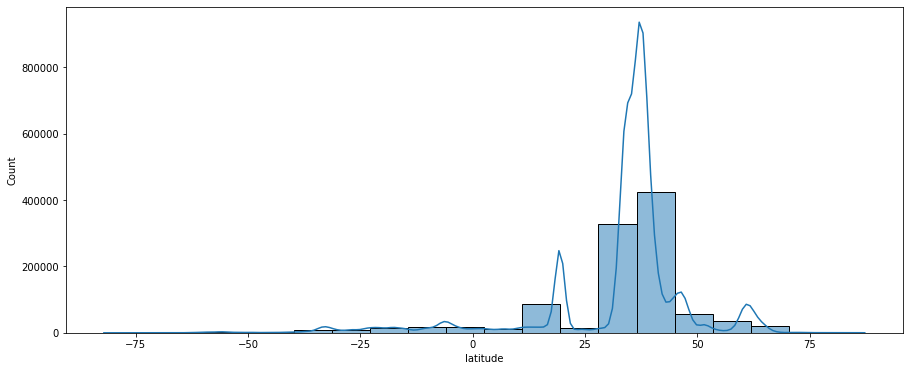

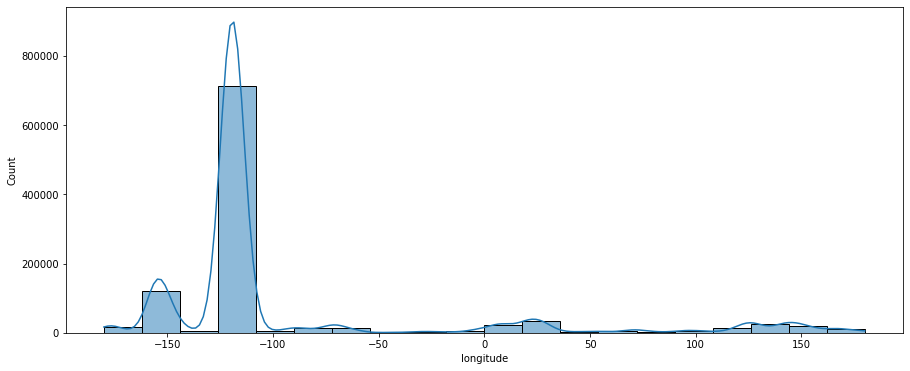

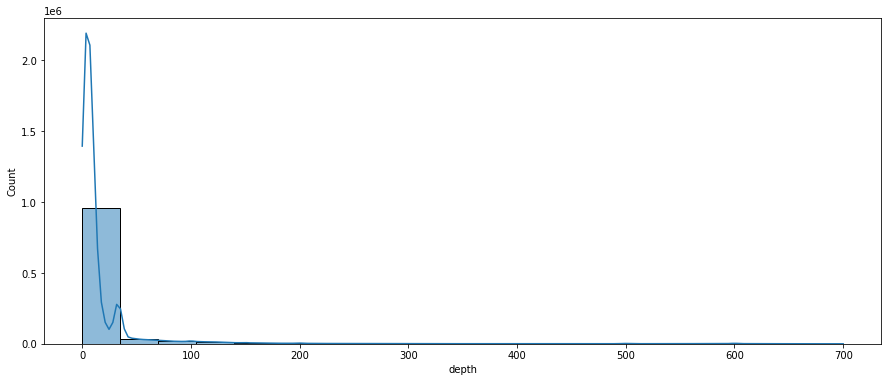

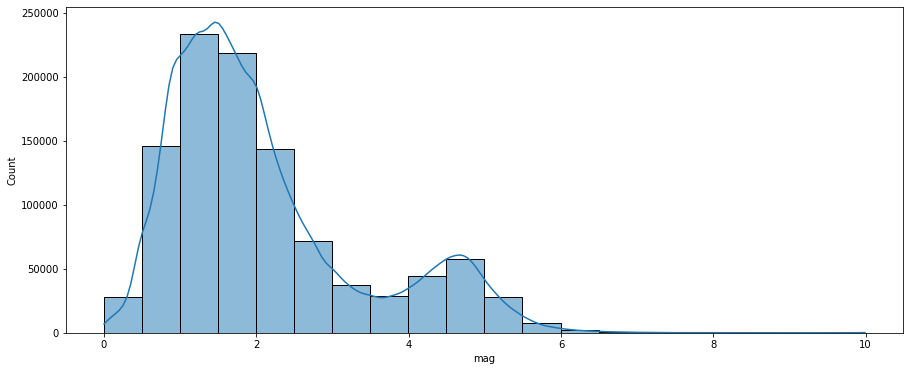

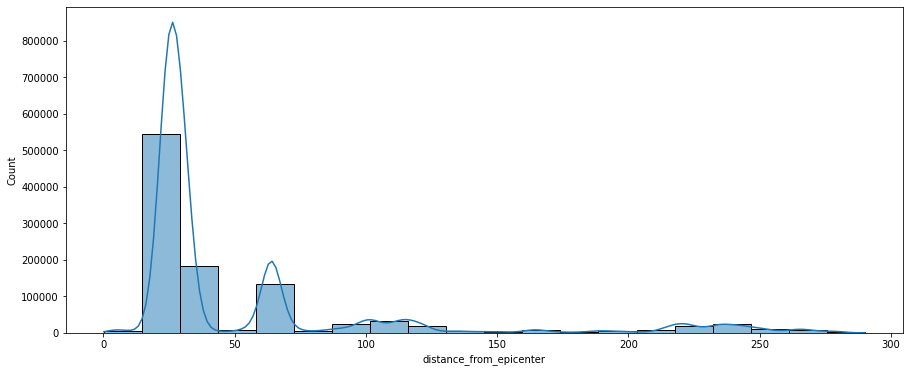

In [35]:
for i in continuous_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

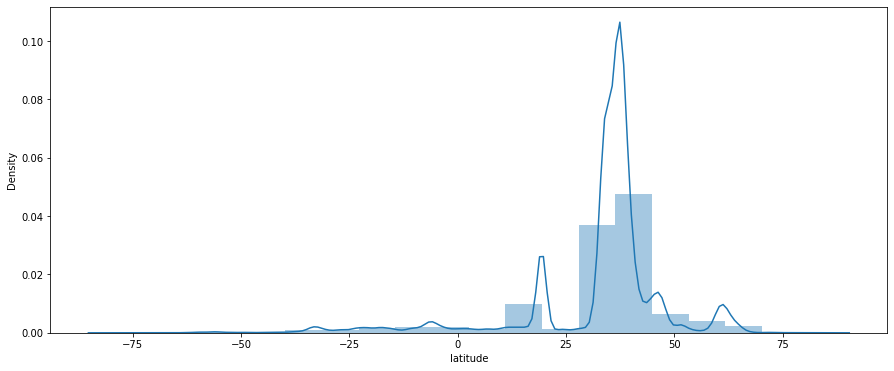

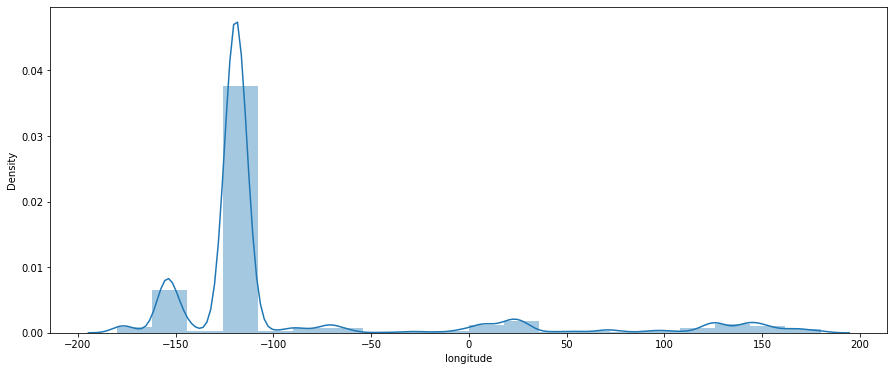

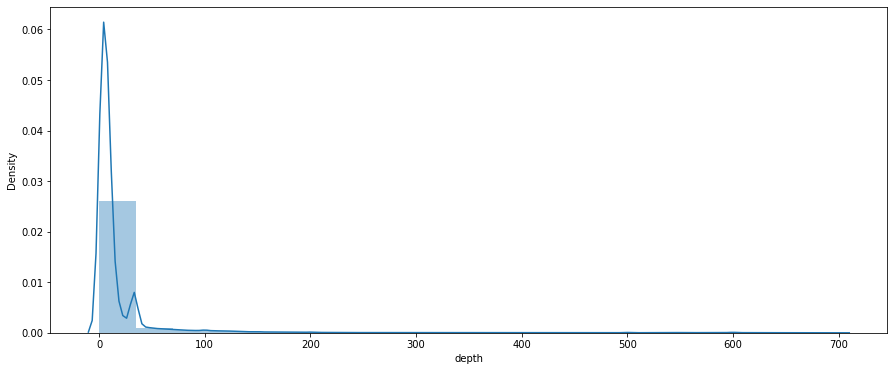

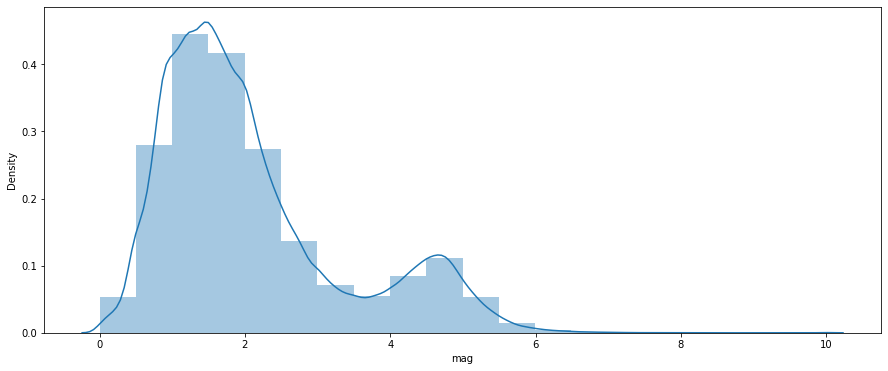

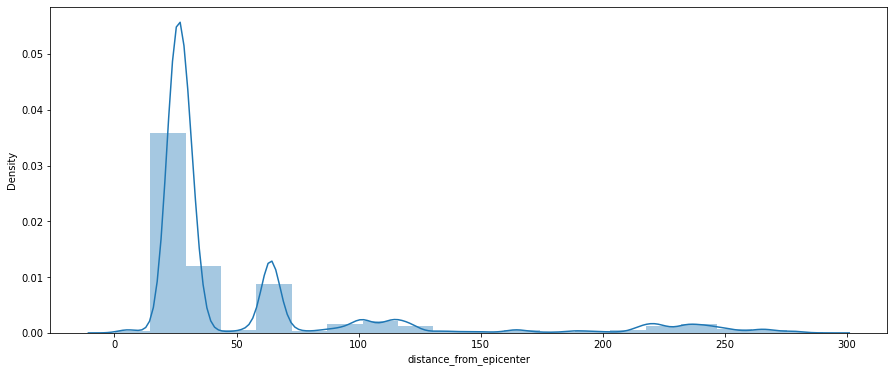

In [36]:
for i in continuous_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

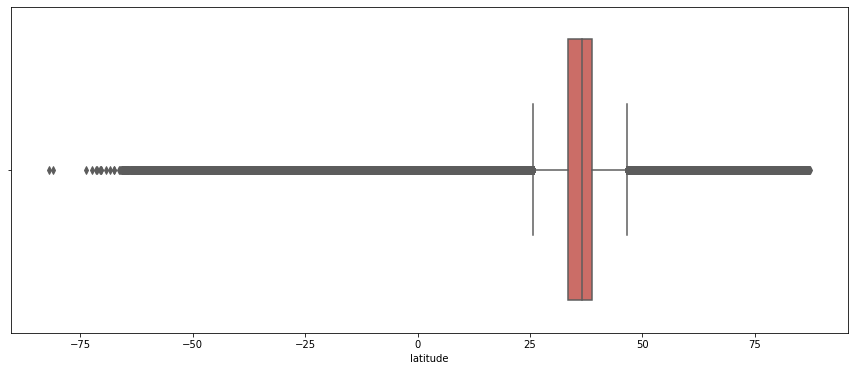

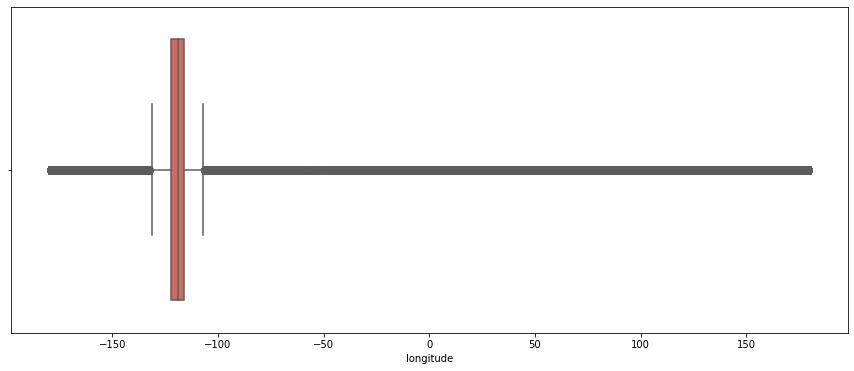

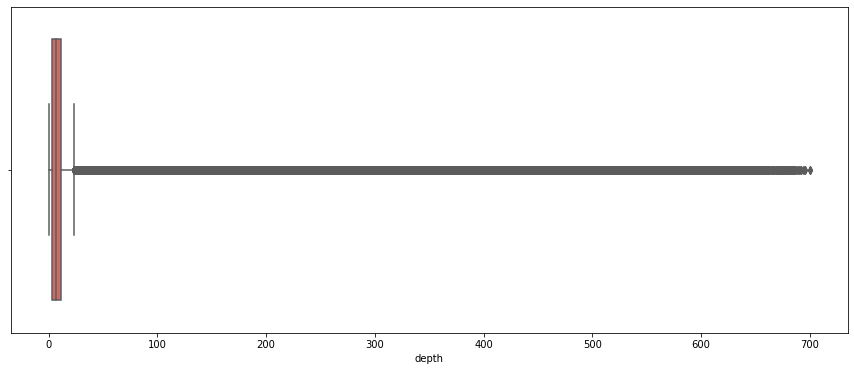

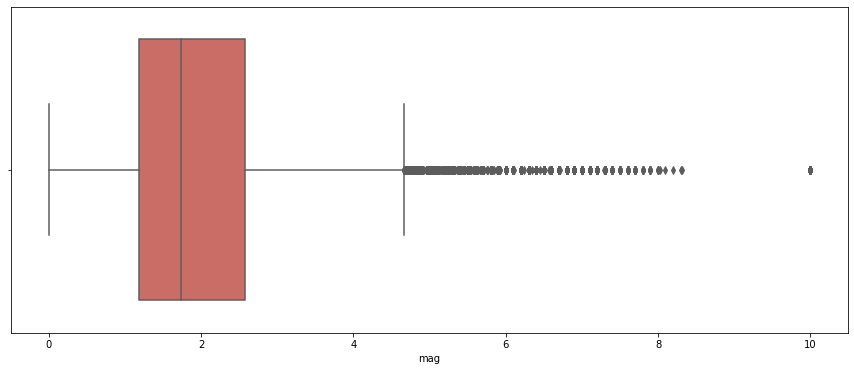

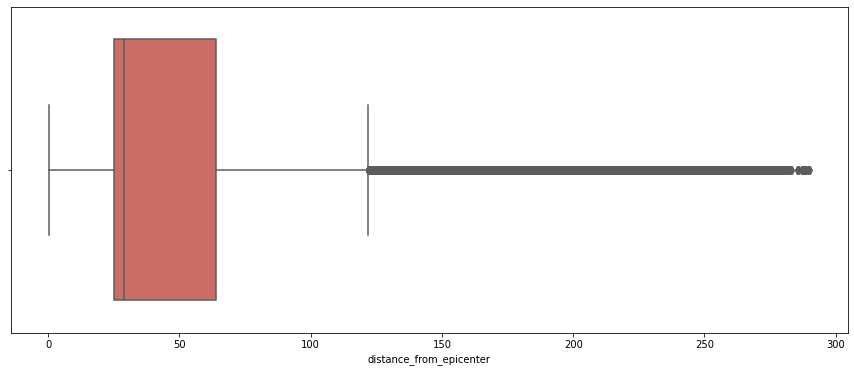

In [37]:
for i in continuous_columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(df[i], data=df, palette='hls')
    plt.xticks(rotation = 0)
    plt.show()

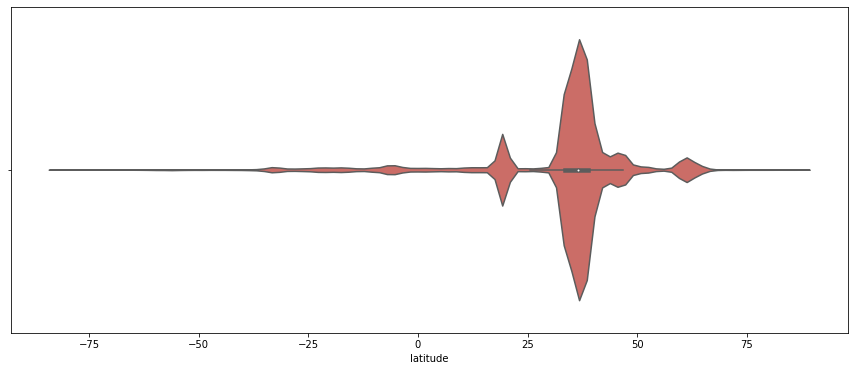

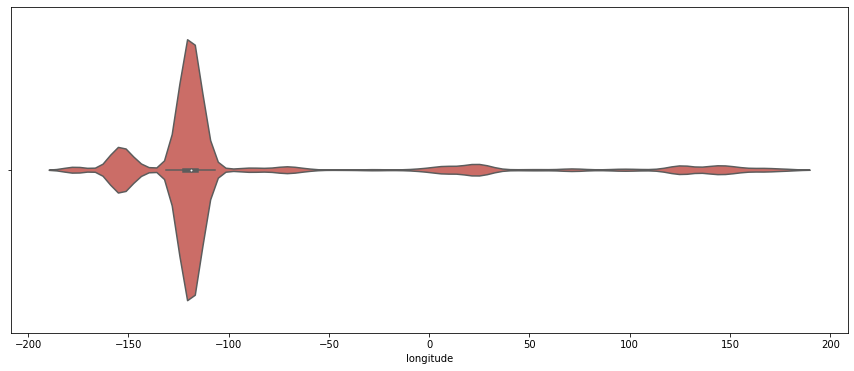

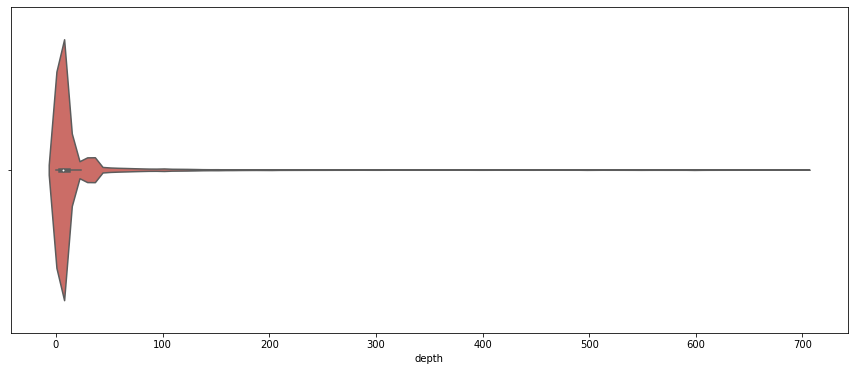

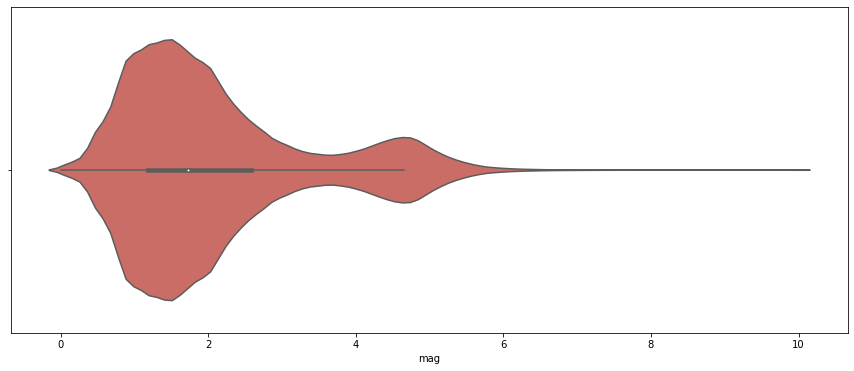

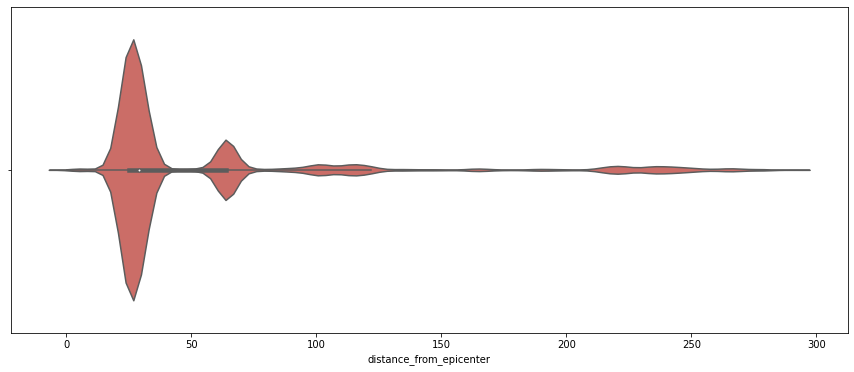

In [38]:
for i in continuous_columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(df[i], data=df, palette='hls')
    plt.xticks(rotation = 0)
    plt.show()

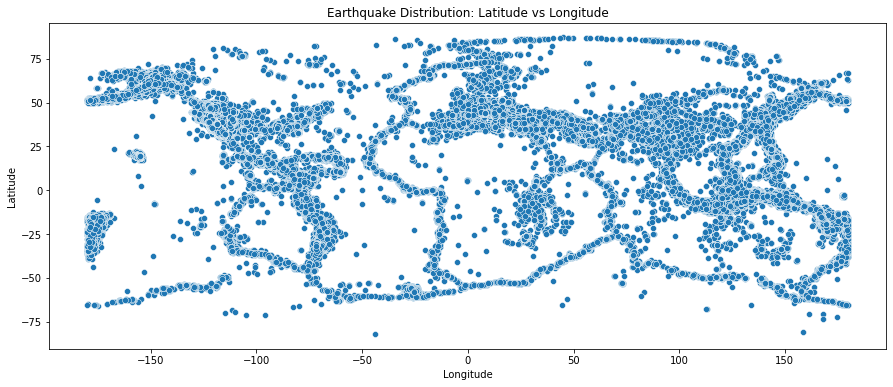

In [39]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['longitude'], y = df['latitude'], data = df, palette = 'hls')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Distribution: Latitude vs Longitude')
plt.show()

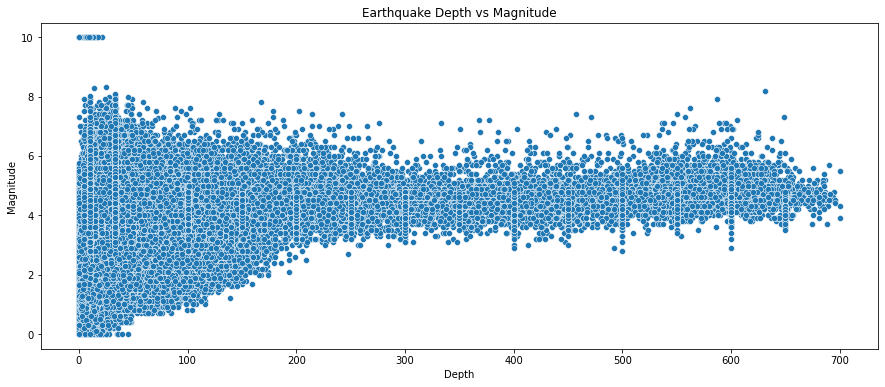

In [40]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['depth'], y = df['mag'], data = df, palette = 'hls')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Earthquake Depth vs Magnitude')
plt.show()

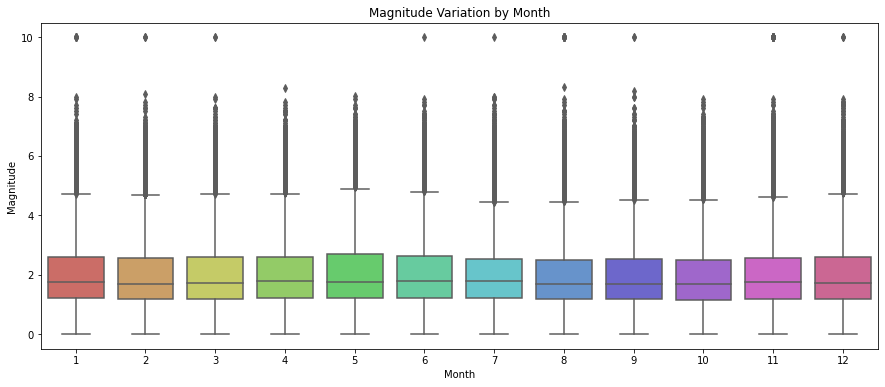

In [41]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['month'], y = df['mag'], data = df, palette = 'hls')
plt.xlabel('Month')
plt.ylabel('Magnitude')
plt.title('Magnitude Variation by Month')
plt.show()

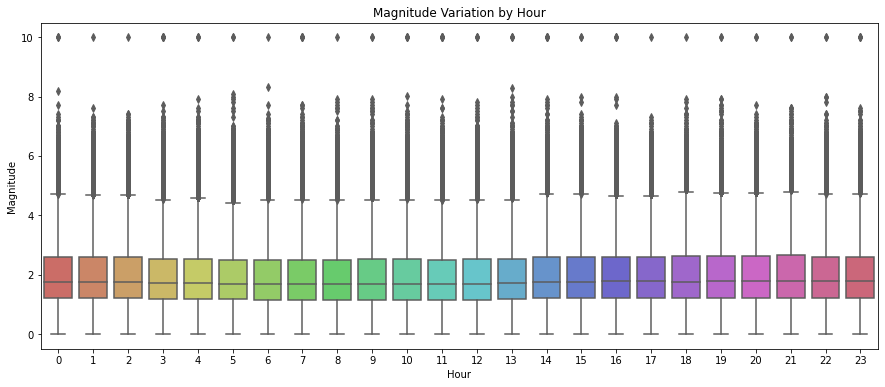

In [42]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['hour'], y = df['mag'], data = df, palette = 'hls')
plt.xlabel('Hour')
plt.ylabel('Magnitude')
plt.title('Magnitude Variation by Hour')
plt.show()

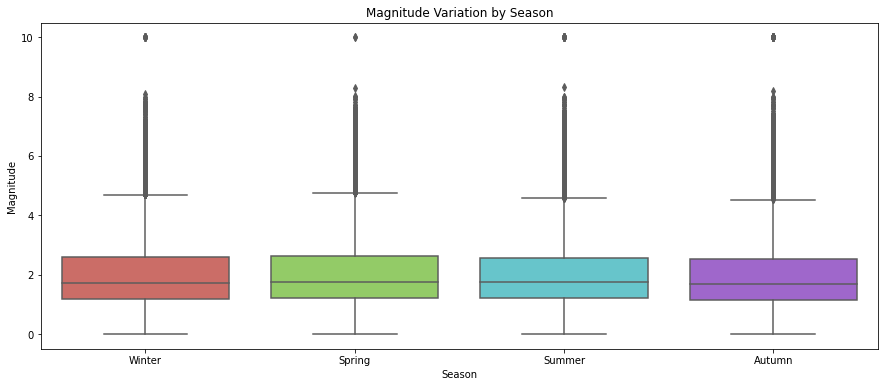

In [43]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['season'], y = df['mag'], data = df, palette = 'hls')
plt.xlabel('Season')
plt.ylabel('Magnitude')
plt.title('Magnitude Variation by Season')
plt.show()

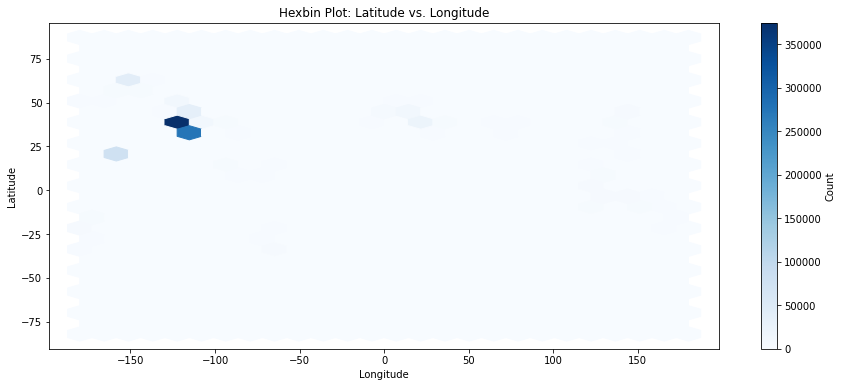

In [44]:
plt.figure(figsize=(15,6))
plt.hexbin(x = df['longitude'], y = df['latitude'], gridsize=25, cmap='Blues')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot: Latitude vs. Longitude')
plt.colorbar(label='Count')
plt.show()

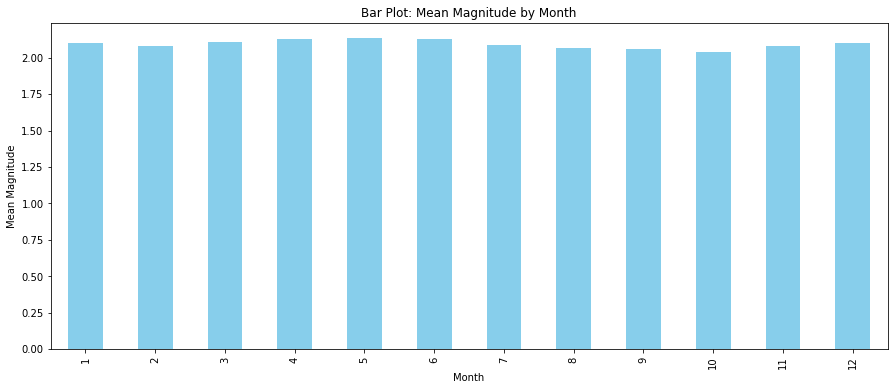

In [45]:
mean_mag_by_month = df.groupby('month')['mag'].mean()
plt.figure(figsize=(15, 6))
mean_mag_by_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Mean Magnitude')
plt.title('Bar Plot: Mean Magnitude by Month')
plt.show()

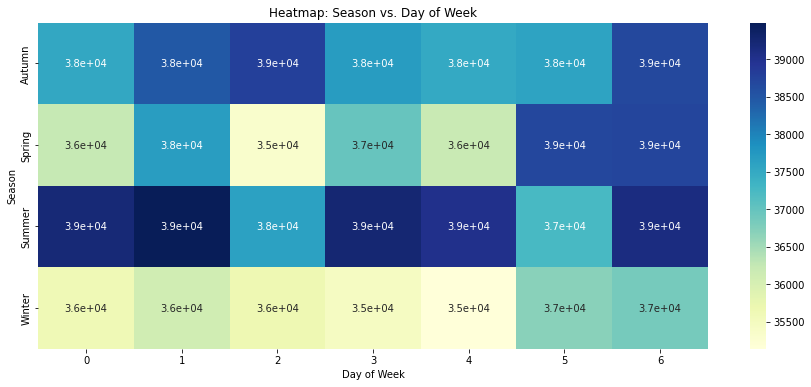

In [46]:
plt.figure(figsize=(15, 6))
sns.heatmap(pd.crosstab(df['season'], df['day_of_week']), annot=True, cmap='YlGnBu')
plt.xlabel('Day of Week')
plt.ylabel('Season')
plt.title('Heatmap: Season vs. Day of Week')
plt.show()

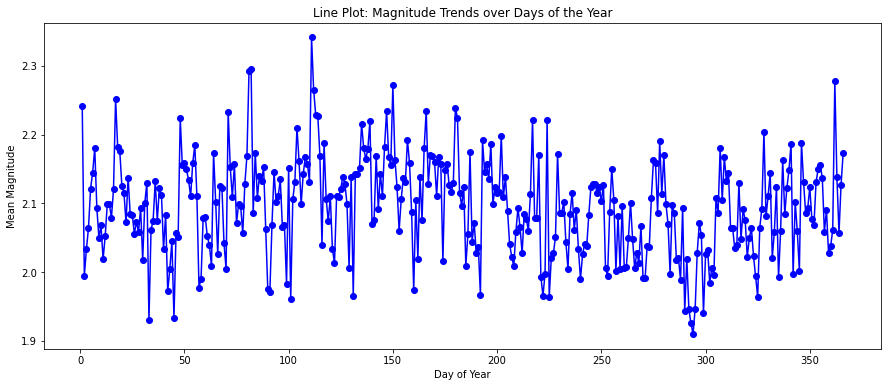

In [47]:
plt.figure(figsize=(15, 6))
plt.plot(df.groupby('day_of_year')['mag'].mean(), marker='o', color='b')
plt.xlabel('Day of Year')
plt.ylabel('Mean Magnitude')
plt.title('Line Plot: Magnitude Trends over Days of the Year')
plt.show()

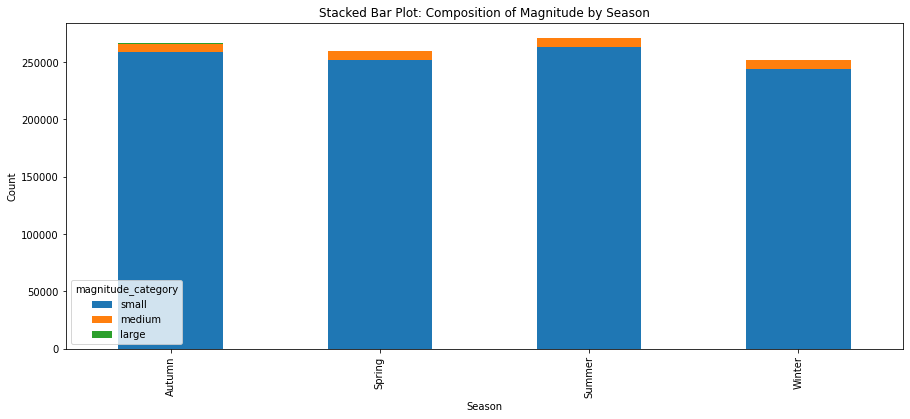

In [48]:
season_mag_composition = df.groupby(['season', 'magnitude_category']).size().unstack()
season_mag_composition.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Composition of Magnitude by Season')
plt.show()

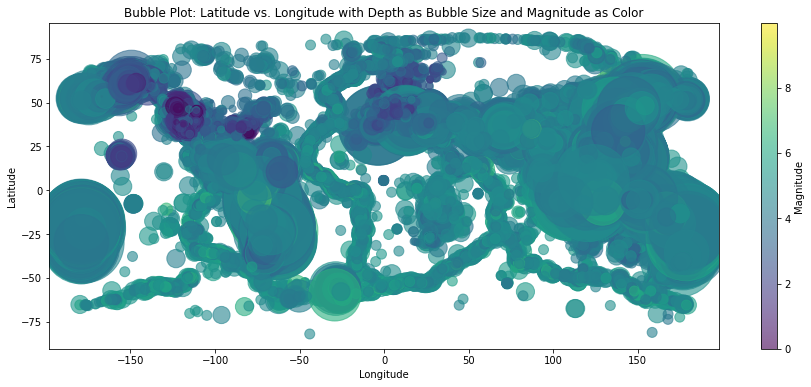

In [49]:
plt.figure(figsize=(15, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['mag'], cmap='viridis', alpha=0.6, s=df['depth']*10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bubble Plot: Latitude vs. Longitude with Depth as Bubble Size and Magnitude as Color')
plt.colorbar(label='Magnitude')
plt.show()

In [50]:
correlation_matrix = df.corr()

In [51]:
correlation_matrix

latitude  longitude     depth       mag      hour  \
latitude                 1.000000  -0.331772 -0.352418 -0.498085 -0.002232   
longitude               -0.331772   1.000000  0.270744  0.644991  0.014426   
depth                   -0.352418   0.270744  1.000000  0.421881  0.005581   
mag                     -0.498085   0.644991  0.421881  1.000000  0.014649   
hour                    -0.002232   0.014426  0.005581  0.014649  1.000000   
day                      0.003491   0.003384 -0.001705 -0.000158  0.001958   
month                   -0.001535  -0.005124 -0.002335 -0.009993  0.001079   
year                     0.105077   0.016264 -0.020326 -0.121625  0.003074   
day_of_week             -0.000633   0.001593 -0.000433 -0.003930  0.004740   
is_weekend              -0.000740   0.001781  0.000178 -0.002826  0.005836   
distance_from_epicenter -0.419312   0.899848  0.401575  0.719173  0.016960   
day_of_year             -0.001243  -0.004893 -0.002522 -0.010009  0.001249   

                              day     month      year  day_of_week  \
latitude                 0.003491 -0.001535  0.105077    -0.000633   
longitude                0.003384 -0.005124  0.016264     0.001593   
depth                   -0.001705 -0.002335 -0.020326    -0.000433   
mag                     -0.000158 -0.009993 -0.121625    -0.003930   
hour                     0.001958  0.001079  0.003074     0.004740   
day                      1.000000  0.021720 -0.000104     0.001877   
month                    0.021720  1.000000 -0.019811    -0.009268   
year                    -0.000104 -0.019811  1.000000     0.001946   
day_of_week              0.001877 -0.009268  0.001946     1.000000   
is_weekend               0.003750 -0.011971  0.000162     0.793534   
distance_from_epicenter -0.004821 -0.007561 -0.028077     0.003249   
day_of_year              0.105597  0.996443 -0.019429    -0.009062   

                         is_weekend  distance_from_epicenter  day_of_year  
latitude                  -0.000740                -0.419312    -0.001243  
longitude                  0.001781                 0.899848    -0.004893  
depth                      0.000178                 0.401575    -0.002522  
mag                       -0.002826                 0.719173    -0.010009  
hour                       0.005836                 0.016960     0.001249  
day                        0.003750                -0.004821     0.105597  
month                     -0.011971                -0.007561     0.996443  
year                       0.000162                -0.028077    -0.019429  
day_of_week                0.793534                 0.003249    -0.009062  
is_weekend                 1.000000                 0.002239    -0.011580  
distance_from_epicenter    0.002239                 1.000000    -0.008046  
day_of_year               -0.011580                -0.008046     1.000000

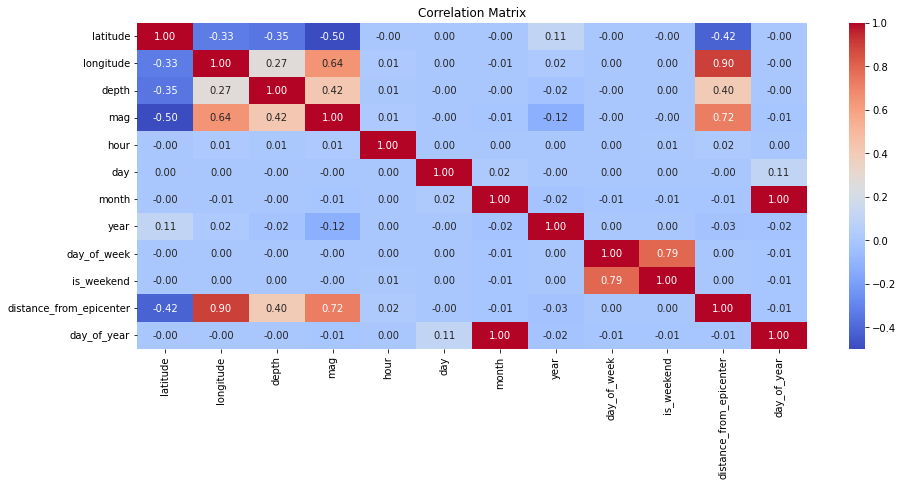

In [52]:
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [53]:
from mpl_toolkits.mplot3d import Axes3D

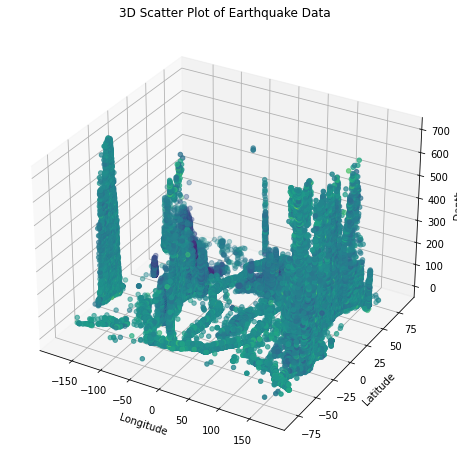

In [54]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['longitude'], df['latitude'], df['depth'], c=df['mag'], cmap='viridis')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth')
ax.set_title('3D Scatter Plot of Earthquake Data')

plt.show()

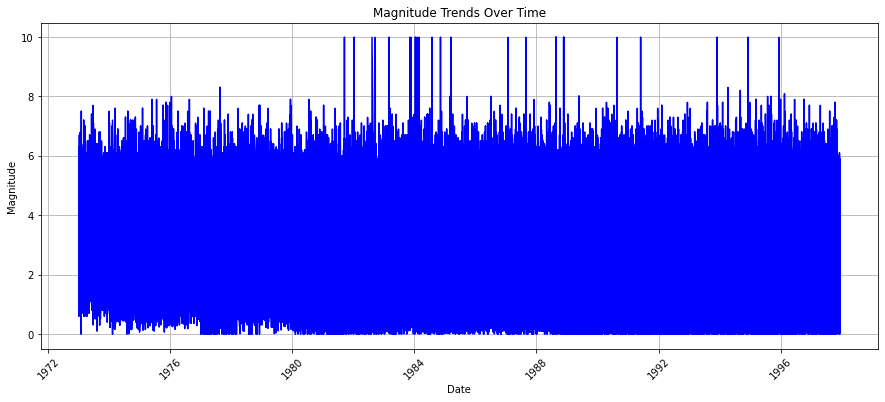

In [55]:
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['mag'], color='blue')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Magnitude Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

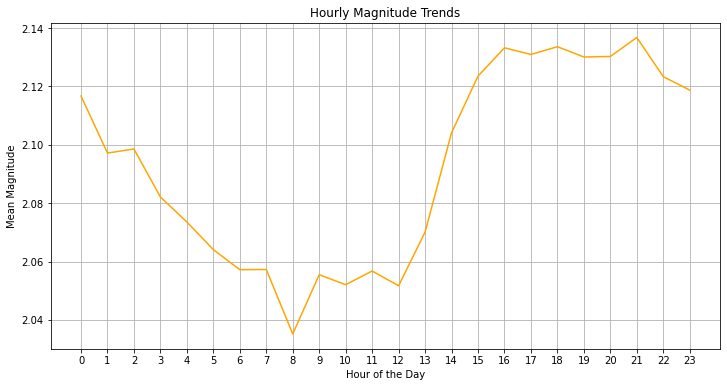

In [56]:
hourly_mean_magnitude = df.groupby('hour')['mag'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_mean_magnitude.index, hourly_mean_magnitude.values, color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Magnitude')
plt.title('Hourly Magnitude Trends')
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [57]:
fig = px.line(hourly_mean_magnitude, title='Hourly Magnitude Trends',
              labels={'hour': 'Hour of the Day', 'mag': 'Mean Magnitude'},
              line_shape='linear', render_mode='svg', width=800, height=400)
fig.update_traces(line=dict(color='orange'))
fig.show()

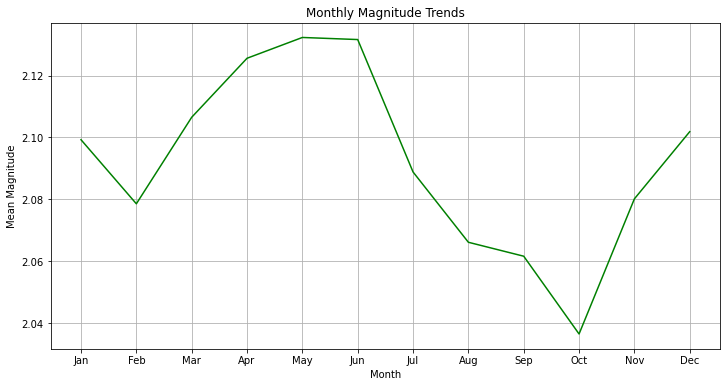

In [58]:
monthly_mean_magnitude = df.groupby('month')['mag'].mean()

# Plotting monthly magnitude trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_magnitude.index, monthly_mean_magnitude.values, color='green')
plt.xlabel('Month')
plt.ylabel('Mean Magnitude')
plt.title('Monthly Magnitude Trends')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [59]:
monthly_mean_magnitude = df.groupby('month')['mag'].mean().reset_index()
fig = px.line(monthly_mean_magnitude, x='month', y='mag',
              labels={'month': 'Month', 'mag': 'Mean Magnitude'},
              title='Monthly Magnitude Trends',
              line_shape='linear', render_mode='svg', width=800, height=400)
fig.update_traces(line=dict(color='green'))
fig.update_xaxes(tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.show()

In [60]:
unique_years = df['date'].dt.year.unique()

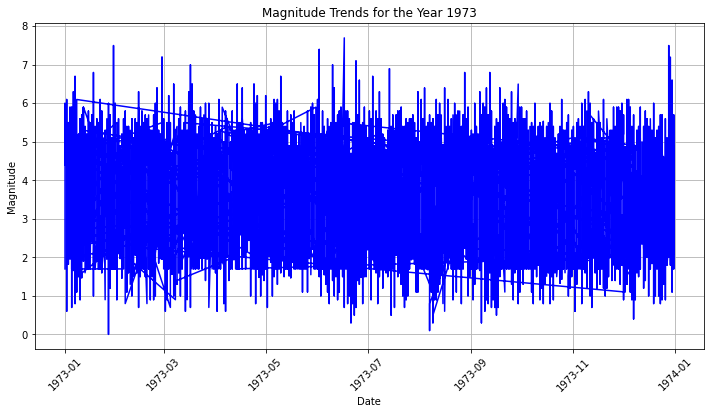

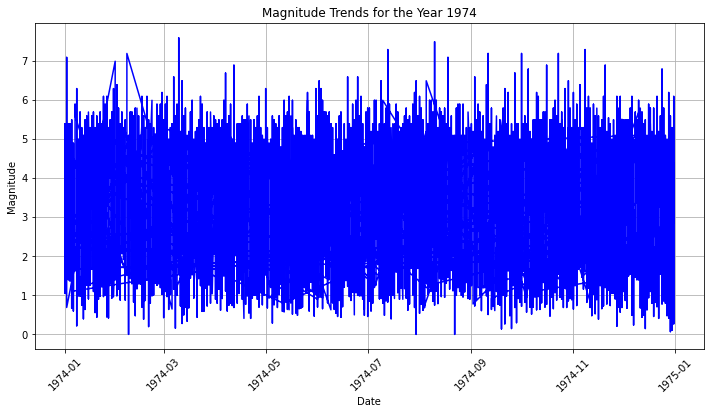

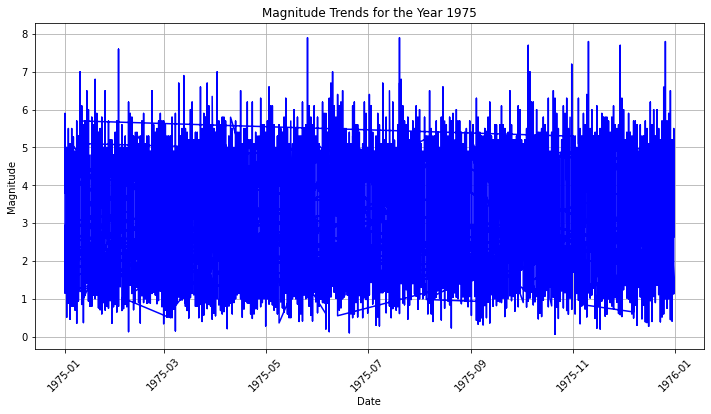

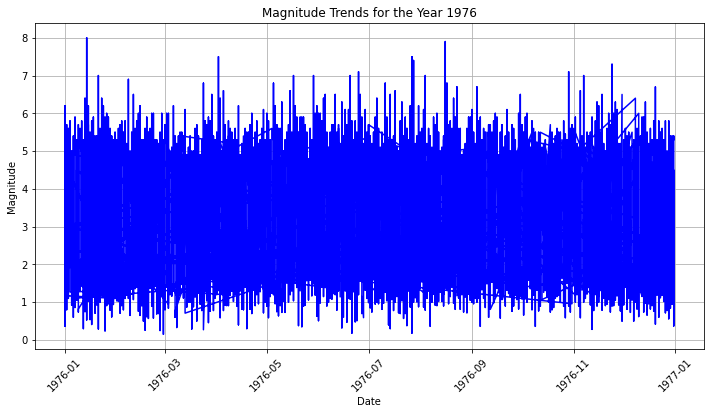

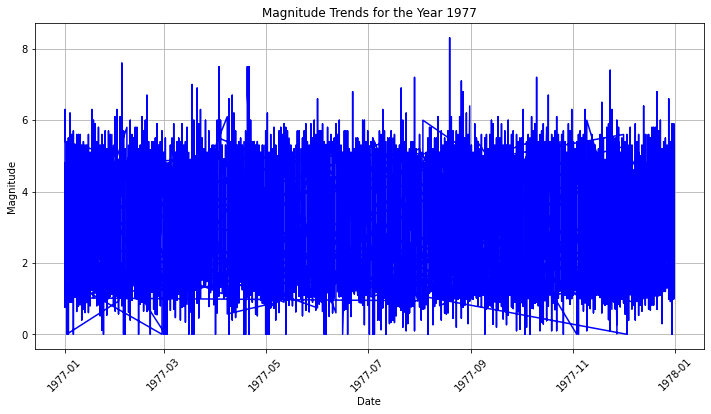

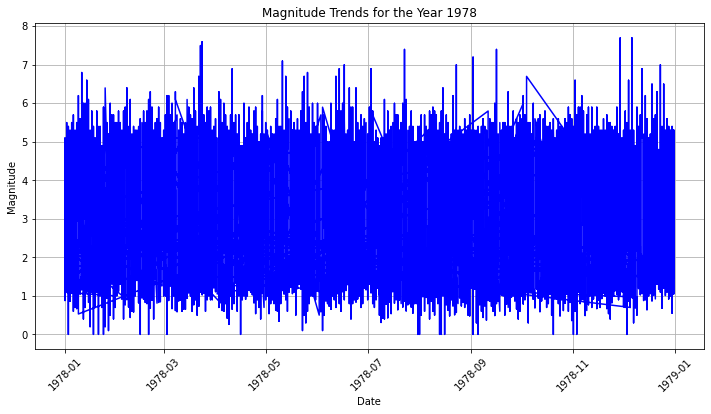

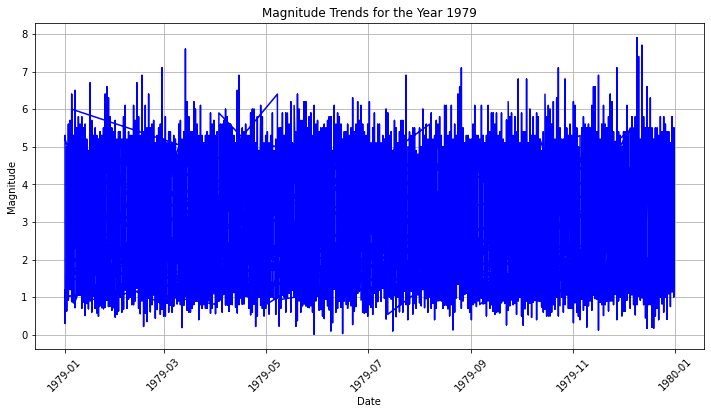

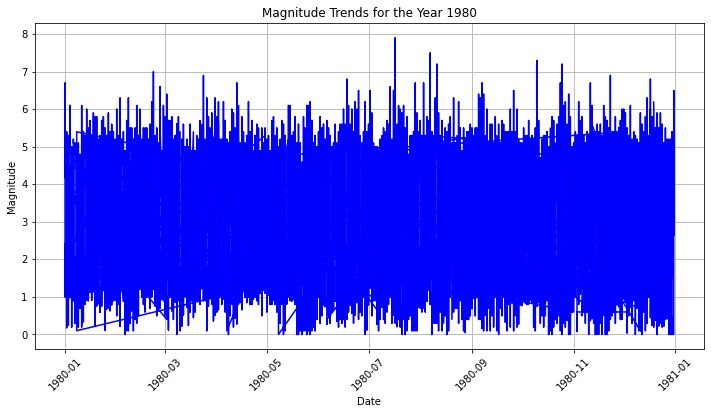

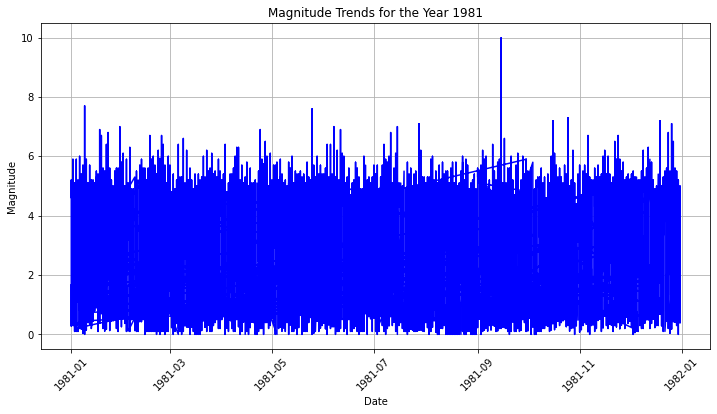

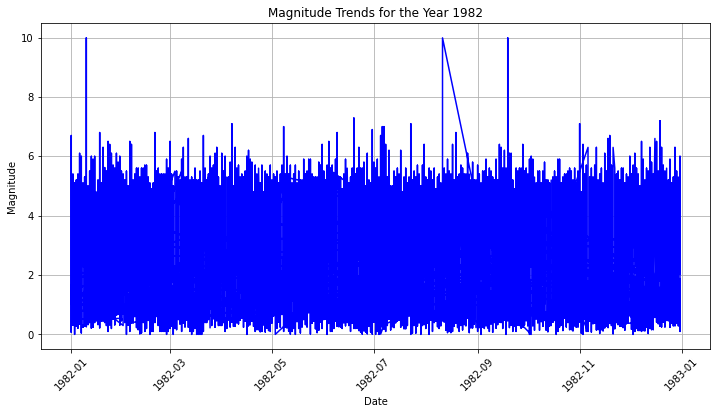

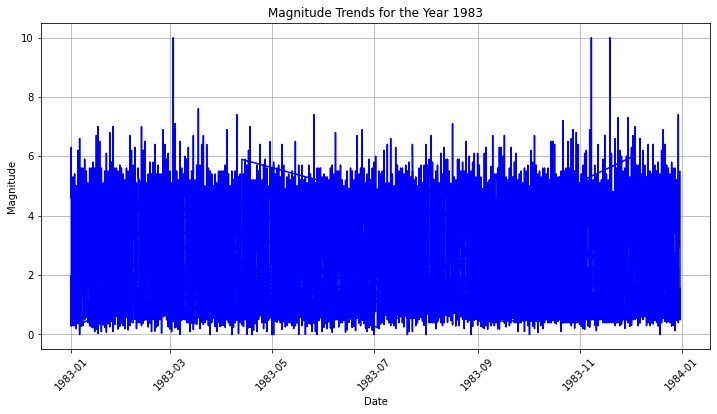

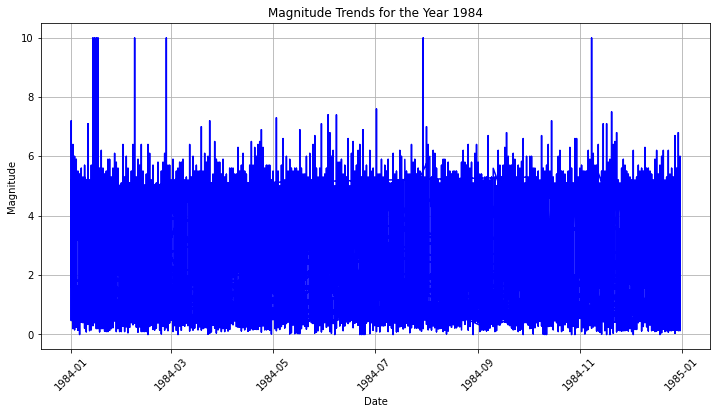

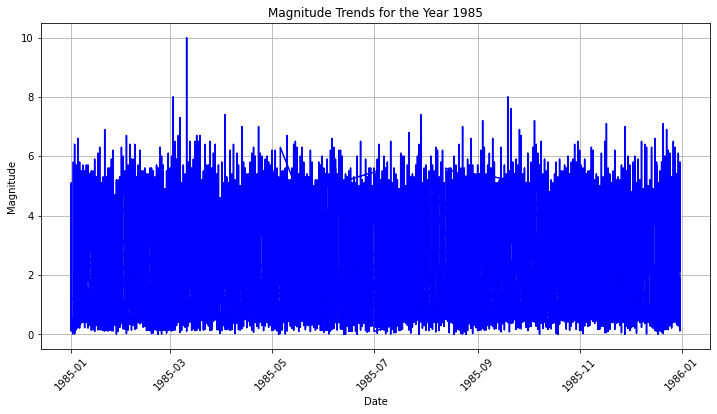

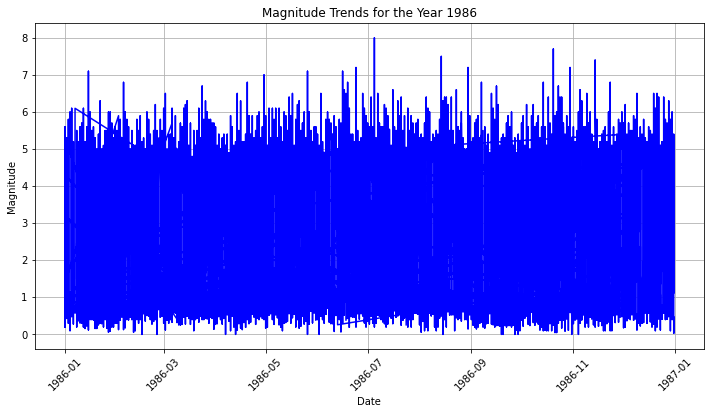

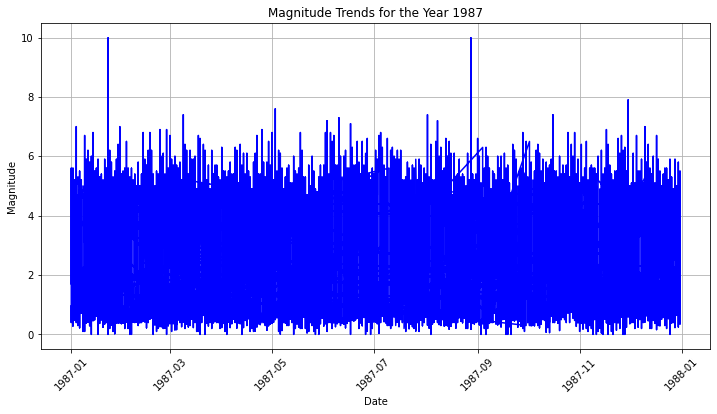

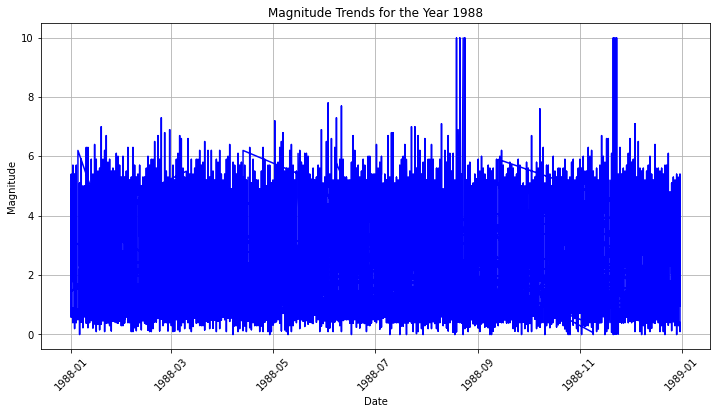

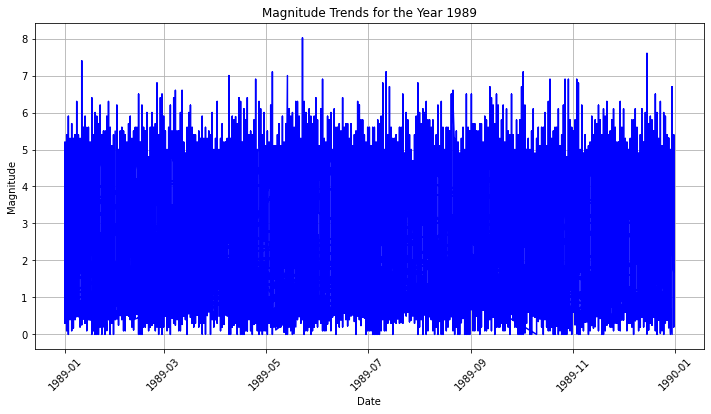

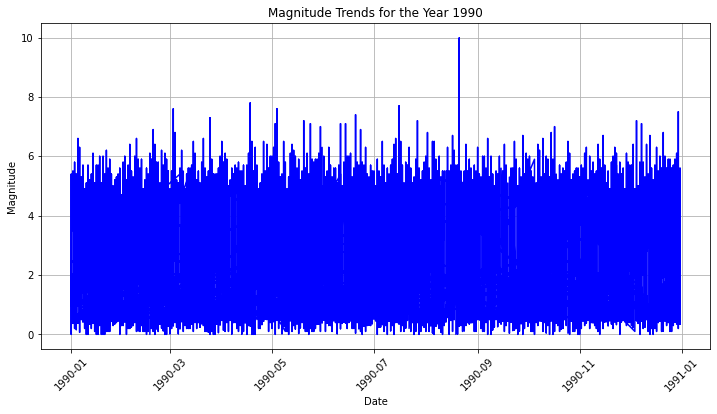

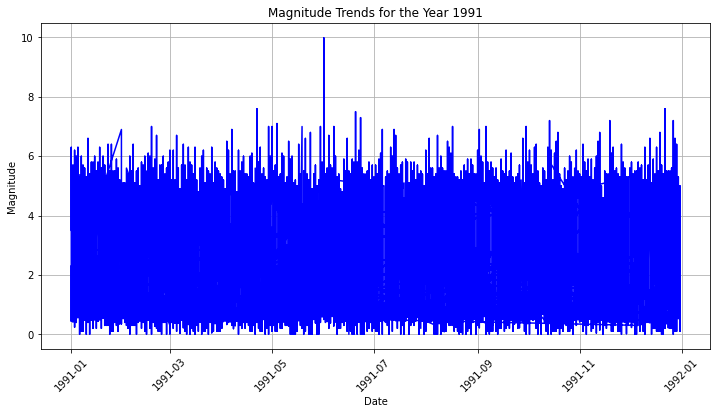

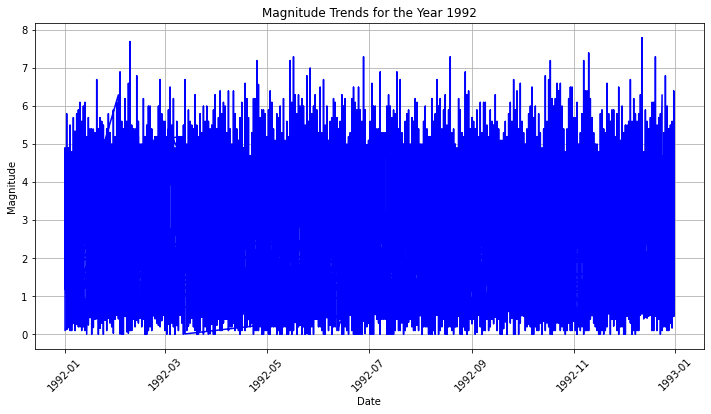

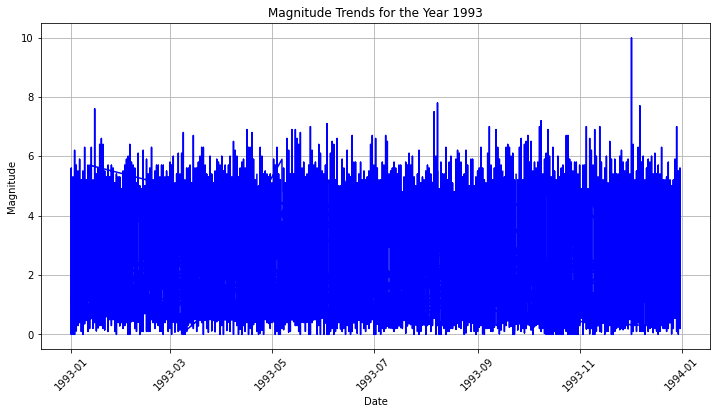

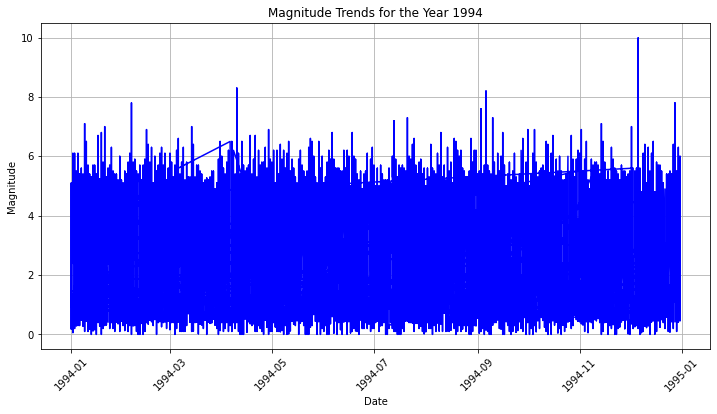

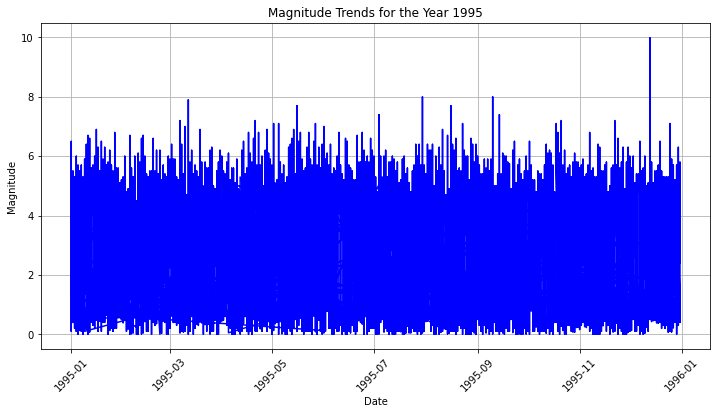

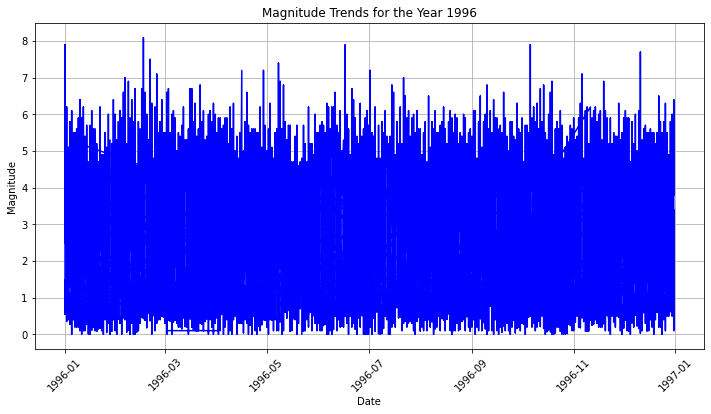

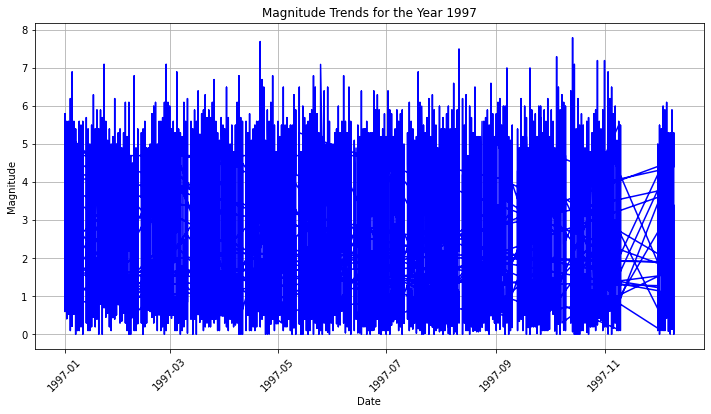

In [61]:
for year in unique_years:
    year_data = df[df['date'].dt.year == year]
    
    plt.figure(figsize=(12, 6))
    plt.plot(year_data['date'], year_data['mag'], color='blue')
    plt.xlabel('Date')
    plt.ylabel('Magnitude')
    plt.title(f'Magnitude Trends for the Year {year}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [62]:
max_mag_data = df.loc[df['mag'].idxmax()]
max_mag_date = max_mag_data['date']
max_mag = max_mag_data['mag']

min_mag_data = df.loc[df['mag'].idxmin()]
min_mag_date = min_mag_data['date']
min_mag = min_mag_data['mag']

print(f'Date with Maximum Magnitude: {max_mag_date}, Magnitude: {max_mag:.2f}')
print(f'Date with Minimum Magnitude: {min_mag_date}, Magnitude: {min_mag:.2f}')

Date with Maximum Magnitude: 1981-09-15 00:00:00, Magnitude: 9.99
Date with Minimum Magnitude: 1973-01-27 00:00:00, Magnitude: 0.00


In [63]:
for year in unique_years:
    year_data = df[df['date'].dt.year == year]
    
    max_mag_date = year_data.loc[year_data['mag'].idxmax(), 'date']
    min_mag_date = year_data.loc[year_data['mag'].idxmin(), 'date']
    max_mag = year_data['mag'].max()
    min_mag = year_data['mag'].min()
    
    print(f'Year: {year}')
    print(f'Max Magnitude: {max_mag:.2f}, Date: {max_mag_date}')
    print(f'Min Magnitude: {min_mag:.2f}, Date: {min_mag_date}\n')

Year: 1973
Max Magnitude: 7.70, Date: 1973-06-17 00:00:00
Min Magnitude: 0.00, Date: 1973-01-27 00:00:00

Year: 1974
Max Magnitude: 7.60, Date: 1974-03-10 00:00:00
Min Magnitude: 0.00, Date: 1974-07-30 00:00:00

Year: 1975
Max Magnitude: 7.90, Date: 1975-05-26 00:00:00
Min Magnitude: 0.06, Date: 1975-10-21 00:00:00

Year: 1976
Max Magnitude: 8.00, Date: 1976-01-14 00:00:00
Min Magnitude: 0.15, Date: 1976-02-29 00:00:00

Year: 1977
Max Magnitude: 8.31, Date: 1977-08-19 00:00:00
Min Magnitude: 0.00, Date: 1977-03-01 00:00:00

Year: 1978
Max Magnitude: 7.70, Date: 1978-12-06 00:00:00
Min Magnitude: 0.00, Date: 1978-08-01 00:00:00

Year: 1979
Max Magnitude: 7.90, Date: 1979-12-09 00:00:00
Min Magnitude: 0.01, Date: 1979-05-30 00:00:00

Year: 1980
Max Magnitude: 7.90, Date: 1980-07-17 00:00:00
Min Magnitude: 0.00, Date: 1980-05-19 00:00:00

Year: 1981
Max Magnitude: 9.99, Date: 1981-09-15 00:00:00
Min Magnitude: 0.00, Date: 1981-02-14 00:00:00

Year: 1982
Max Magnitude: 9.99, Date: 1982-09-

In [64]:
for year in unique_years:
    year_data = df[df['date'].dt.year == year]
    
    unique_months = year_data['date'].dt.month.unique()
    
    print(f'Year: {year}')
    
    for month in unique_months:
        month_data = year_data[year_data['date'].dt.month == month]
        max_mag_date = month_data.loc[month_data['mag'].idxmax(), 'date']
        min_mag_date = month_data.loc[month_data['mag'].idxmin(), 'date']
        max_mag = month_data['mag'].max()
        min_mag = month_data['mag'].min()
        
        print(f'\tMonth: {month}')
        print(f'\t\tMax Magnitude: {max_mag:.2f}, Date: {max_mag_date}')
        print(f'\t\tMin Magnitude: {min_mag:.2f}, Date: {min_mag_date}')
    
    print()  

Year: 1973
	Month: 1
		Max Magnitude: 7.50, Date: 1973-01-30 00:00:00
		Min Magnitude: 0.00, Date: 1973-01-27 00:00:00
	Month: 2
		Max Magnitude: 7.20, Date: 1973-02-28 00:00:00
		Min Magnitude: 0.70, Date: 1973-02-14 00:00:00
	Month: 3
		Max Magnitude: 7.00, Date: 1973-03-17 00:00:00
		Min Magnitude: 0.60, Date: 1973-03-02 00:00:00
	Month: 4
		Max Magnitude: 6.50, Date: 1973-04-14 00:00:00
		Min Magnitude: 0.60, Date: 1973-04-02 00:00:00
	Month: 5
		Max Magnitude: 6.70, Date: 1973-05-10 00:00:00
		Min Magnitude: 0.70, Date: 1973-05-02 00:00:00
	Month: 6
		Max Magnitude: 7.70, Date: 1973-06-17 00:00:00
		Min Magnitude: 0.30, Date: 1973-06-21 00:00:00
	Month: 7
		Max Magnitude: 6.90, Date: 1973-07-14 00:00:00
		Min Magnitude: 0.50, Date: 1973-07-15 00:00:00
	Month: 8
		Max Magnitude: 6.80, Date: 1973-08-28 00:00:00
		Min Magnitude: 0.10, Date: 1973-08-07 00:00:00
	Month: 9
		Max Magnitude: 6.80, Date: 1973-09-12 00:00:00
		Min Magnitude: 0.30, Date: 1973-09-07 00:00:00
	Month: 10
		Max 

Year: 1980
	Month: 1
		Max Magnitude: 6.70, Date: 1980-01-01 00:00:00
		Min Magnitude: 0.10, Date: 1980-01-08 00:00:00
	Month: 2
		Max Magnitude: 7.00, Date: 1980-02-23 00:00:00
		Min Magnitude: 0.00, Date: 1980-02-06 00:00:00
	Month: 3
		Max Magnitude: 6.90, Date: 1980-03-24 00:00:00
		Min Magnitude: 0.00, Date: 1980-03-08 00:00:00
	Month: 4
		Max Magnitude: 6.70, Date: 1980-04-13 00:00:00
		Min Magnitude: 0.00, Date: 1980-04-08 00:00:00
	Month: 5
		Max Magnitude: 6.20, Date: 1980-05-27 00:00:00
		Min Magnitude: 0.00, Date: 1980-05-19 00:00:00
	Month: 6
		Max Magnitude: 6.80, Date: 1980-06-18 00:00:00
		Min Magnitude: 0.00, Date: 1980-06-29 00:00:00
	Month: 7
		Max Magnitude: 7.90, Date: 1980-07-17 00:00:00
		Min Magnitude: 0.00, Date: 1980-07-21 00:00:00
	Month: 8
		Max Magnitude: 7.50, Date: 1980-08-07 00:00:00
		Min Magnitude: 0.00, Date: 1980-08-08 00:00:00
	Month: 9
		Max Magnitude: 6.70, Date: 1980-09-07 00:00:00
		Min Magnitude: 0.00, Date: 1980-09-17 00:00:00
	Month: 10
		Max 

Year: 1988
	Month: 1
		Max Magnitude: 7.00, Date: 1988-01-19 00:00:00
		Min Magnitude: 0.00, Date: 1988-01-06 00:00:00
	Month: 2
		Max Magnitude: 7.30, Date: 1988-02-24 00:00:00
		Min Magnitude: 0.10, Date: 1988-02-17 00:00:00
	Month: 3
		Max Magnitude: 6.70, Date: 1988-03-06 00:00:00
		Min Magnitude: 0.10, Date: 1988-03-02 00:00:00
	Month: 4
		Max Magnitude: 6.40, Date: 1988-04-05 00:00:00
		Min Magnitude: 0.00, Date: 1988-04-29 00:00:00
	Month: 5
		Max Magnitude: 7.20, Date: 1988-05-02 00:00:00
		Min Magnitude: 0.00, Date: 1988-05-10 00:00:00
	Month: 6
		Max Magnitude: 7.80, Date: 1988-06-03 00:00:00
		Min Magnitude: 0.00, Date: 1988-06-17 00:00:00
	Month: 7
		Max Magnitude: 7.00, Date: 1988-07-23 00:00:00
		Min Magnitude: 0.00, Date: 1988-07-16 00:00:00
	Month: 8
		Max Magnitude: 9.99, Date: 1988-08-19 00:00:00
		Min Magnitude: 0.00, Date: 1988-08-18 00:00:00
	Month: 9
		Max Magnitude: 6.20, Date: 1988-09-15 00:00:00
		Min Magnitude: 0.00, Date: 1988-09-08 00:00:00
	Month: 10
		Max 

Year: 1995
	Month: 1
		Max Magnitude: 6.90, Date: 1995-01-16 00:00:00
		Min Magnitude: 0.00, Date: 1995-01-23 00:00:00
	Month: 2
		Max Magnitude: 6.70, Date: 1995-02-13 00:00:00
		Min Magnitude: 0.00, Date: 1995-02-18 00:00:00
	Month: 3
		Max Magnitude: 7.90, Date: 1995-03-12 00:00:00
		Min Magnitude: 0.00, Date: 1995-03-15 00:00:00
	Month: 4
		Max Magnitude: 7.20, Date: 1995-04-21 00:00:00
		Min Magnitude: 0.00, Date: 1995-04-17 00:00:00
	Month: 5
		Max Magnitude: 7.70, Date: 1995-05-16 00:00:00
		Min Magnitude: 0.00, Date: 1995-05-01 00:00:00
	Month: 6
		Max Magnitude: 7.00, Date: 1995-06-01 00:00:00
		Min Magnitude: 0.00, Date: 1995-06-06 00:00:00
	Month: 7
		Max Magnitude: 8.00, Date: 1995-07-30 00:00:00
		Min Magnitude: 0.00, Date: 1995-07-02 00:00:00
	Month: 8
		Max Magnitude: 7.70, Date: 1995-08-16 00:00:00
		Min Magnitude: 0.00, Date: 1995-08-06 00:00:00
	Month: 9
		Max Magnitude: 8.00, Date: 1995-09-10 00:00:00
		Min Magnitude: 0.00, Date: 1995-09-04 00:00:00
	Month: 10
		Max 

In [65]:
for year in unique_years:
    year_data = df[df['date'].dt.year == year]
    unique_months = year_data['date'].dt.month.unique()
    
    print(f'Year: {year}')
    
    for month in unique_months:
        month_data = year_data[year_data['date'].dt.month == month]
        max_data = month_data.loc[month_data['mag'].idxmax()]
        min_data = month_data.loc[month_data['mag'].idxmin()]
        
        print(f'\tMonth: {month}')
        print(f'\t\tMaximum Magnitude: {max_data["mag"]:.2f}')
        print(f'\t\t\tDate: {max_data["date"]}, Latitude: {max_data["latitude"]}, Longitude: {max_data["longitude"]}, Depth: {max_data["depth"]}')
        print(f'\t\tMinimum Magnitude: {min_data["mag"]:.2f}')
        print(f'\t\t\tDate: {min_data["date"]}, Latitude: {min_data["latitude"]}, Longitude: {min_data["longitude"]}, Depth: {min_data["depth"]}')
    
    print() 

Year: 1973
	Month: 1
		Maximum Magnitude: 7.50
			Date: 1973-01-30 00:00:00, Latitude: 18.481, Longitude: -102.996, Depth: 43.0
		Minimum Magnitude: 0.00
			Date: 1973-01-27 00:00:00, Latitude: 34.468666, Longitude: -118.41217, Depth: 10.68
	Month: 2
		Maximum Magnitude: 7.20
			Date: 1973-02-28 00:00:00, Latitude: 50.486, Longitude: 156.584, Depth: 27.0
		Minimum Magnitude: 0.70
			Date: 1973-02-14 00:00:00, Latitude: 46.654667, Longitude: -119.12417, Depth: 0.0
	Month: 3
		Maximum Magnitude: 7.00
			Date: 1973-03-17 00:00:00, Latitude: 13.372, Longitude: 122.787, Depth: 33.0
		Minimum Magnitude: 0.60
			Date: 1973-03-02 00:00:00, Latitude: 46.846832, Longitude: -119.305, Depth: 0.116
	Month: 4
		Maximum Magnitude: 6.50
			Date: 1973-04-14 00:00:00, Latitude: 10.679, Longitude: -84.759, Depth: 33.0
		Minimum Magnitude: 0.60
			Date: 1973-04-02 00:00:00, Latitude: 46.662167, Longitude: -119.16433, Depth: 0.0
	Month: 5
		Maximum Magnitude: 6.70
			Date: 1973-05-10 00:00:00, Latitude: -3

	Month: 8
		Maximum Magnitude: 8.31
			Date: 1977-08-19 00:00:00, Latitude: -11.164, Longitude: 118.378, Depth: 25.0
		Minimum Magnitude: 0.00
			Date: 1977-08-06 00:00:00, Latitude: 29.0, Longitude: -114.0, Depth: 5.0
	Month: 9
		Maximum Magnitude: 6.10
			Date: 1977-09-17 00:00:00, Latitude: 11.772, Longitude: 143.127, Depth: 33.0
		Minimum Magnitude: 0.00
			Date: 1977-09-09 00:00:00, Latitude: 46.7015, Longitude: -119.537834, Depth: 0.0
	Month: 10
		Maximum Magnitude: 7.20
			Date: 1977-10-10 00:00:00, Latitude: -25.856, Longitude: -175.406, Depth: 33.0
		Minimum Magnitude: 0.00
			Date: 1977-10-03 00:00:00, Latitude: 34.205334, Longitude: -116.4655, Depth: 6.0
	Month: 11
		Maximum Magnitude: 7.40
			Date: 1977-11-23 00:00:00, Latitude: -31.028, Longitude: -67.767, Depth: 13.0
		Minimum Magnitude: 0.00
			Date: 1977-11-03 00:00:00, Latitude: 34.91, Longitude: -119.493, Depth: 3.07
	Month: 12
		Maximum Magnitude: 6.80
			Date: 1977-12-21 00:00:00, Latitude: 25.51, Longitude: 143.112

	Month: 6
		Maximum Magnitude: 7.00
			Date: 1981-06-07 00:00:00, Latitude: -22.293, Longitude: 171.742, Depth: 33.0
		Minimum Magnitude: 0.00
			Date: 1981-06-03 00:00:00, Latitude: 33.25733, Longitude: -116.0185, Depth: 5.326
	Month: 7
		Maximum Magnitude: 7.10
			Date: 1981-07-28 00:00:00, Latitude: 30.013, Longitude: 57.794, Depth: 33.0
		Minimum Magnitude: 0.00
			Date: 1981-07-03 00:00:00, Latitude: 46.358166, Longitude: -122.234665, Depth: 7.205
	Month: 8
		Maximum Magnitude: 6.00
			Date: 1981-08-05 00:00:00, Latitude: 42.66, Longitude: 139.129, Depth: 200.4
		Minimum Magnitude: 0.00
			Date: 1981-08-03 00:00:00, Latitude: 33.452168, Longitude: -117.664, Depth: 9.444
	Month: 9
		Maximum Magnitude: 9.99
			Date: 1981-09-15 00:00:00, Latitude: 44.531834, Longitude: -110.96117, Depth: 6.43
		Minimum Magnitude: 0.00
			Date: 1981-09-03 00:00:00, Latitude: 46.3355, Longitude: -122.228165, Depth: 6.888
	Month: 10
		Maximum Magnitude: 7.30
			Date: 1981-10-25 00:00:00, Latitude: 18.04

Year: 1985
	Month: 1
		Maximum Magnitude: 6.90
			Date: 1985-01-21 00:00:00, Latitude: -0.953, Longitude: 128.507, Depth: 33.0
		Minimum Magnitude: 0.02
			Date: 1985-01-28 00:00:00, Latitude: 36.590168, Longitude: -121.1885, Depth: 5.64
	Month: 2
		Maximum Magnitude: 6.70
			Date: 1985-02-03 00:00:00, Latitude: -1.964, Longitude: 119.727, Depth: 43.5
		Minimum Magnitude: 0.00
			Date: 1985-02-22 00:00:00, Latitude: 38.42, Longitude: -87.88, Depth: 12.2
	Month: 3
		Maximum Magnitude: 9.99
			Date: 1985-03-11 00:00:00, Latitude: 37.729168, Longitude: -110.659, Depth: 11.59
		Minimum Magnitude: 0.04
			Date: 1985-03-31 00:00:00, Latitude: 36.12, Longitude: -117.824, Depth: 8.77
	Month: 4
		Maximum Magnitude: 7.40
			Date: 1985-04-03 00:00:00, Latitude: -33.207, Longitude: -71.663, Depth: 33.0
		Minimum Magnitude: 0.03
			Date: 1985-04-09 00:00:00, Latitude: 37.5765, Longitude: -118.87, Depth: 0.0
	Month: 5
		Maximum Magnitude: 6.70
			Date: 1985-05-10 00:00:00, Latitude: 62.237, Longitud

Year: 1990
	Month: 1
		Maximum Magnitude: 6.60
			Date: 1990-01-05 00:00:00, Latitude: 58.5212, Longitude: -156.5416, Depth: 252.0
		Minimum Magnitude: 0.00
			Date: 1990-01-01 00:00:00, Latitude: 46.205666, Longitude: -122.179665, Depth: 5.98
	Month: 2
		Maximum Magnitude: 6.90
			Date: 1990-02-19 00:00:00, Latitude: -15.465, Longitude: 166.385, Depth: 12.1
		Minimum Magnitude: 0.00
			Date: 1990-02-15 00:00:00, Latitude: 46.2245, Longitude: -122.20517, Depth: 5.786
	Month: 3
		Maximum Magnitude: 7.60
			Date: 1990-03-03 00:00:00, Latitude: -22.122, Longitude: 175.163, Depth: 33.2
		Minimum Magnitude: 0.00
			Date: 1990-03-25 00:00:00, Latitude: 46.216, Longitude: -122.194, Depth: 6.222
	Month: 4
		Maximum Magnitude: 7.80
			Date: 1990-04-18 00:00:00, Latitude: 1.186, Longitude: 122.857, Depth: 25.7
		Minimum Magnitude: 0.00
			Date: 1990-04-16 00:00:00, Latitude: 46.192833, Longitude: -122.1835, Depth: 4.766
	Month: 5
		Maximum Magnitude: 7.60
			Date: 1990-05-04 00:00:00, Latitude: 

Year: 1993
	Month: 1
		Maximum Magnitude: 7.60
			Date: 1993-01-15 00:00:00, Latitude: 43.3, Longitude: 143.691, Depth: 102.2
		Minimum Magnitude: 0.00
			Date: 1993-01-01 00:00:00, Latitude: 46.200333, Longitude: -122.185165, Depth: 0.349
	Month: 2
		Maximum Magnitude: 6.40
			Date: 1993-02-05 00:00:00, Latitude: -56.415, Longitude: -24.491, Depth: 12.9
		Minimum Magnitude: 0.00
			Date: 1993-02-25 00:00:00, Latitude: 46.89, Longitude: -121.76683, Depth: 0.0
	Month: 3
		Maximum Magnitude: 6.80
			Date: 1993-03-09 00:00:00, Latitude: 14.523, Longitude: -92.713, Depth: 26.5
		Minimum Magnitude: 0.00
			Date: 1993-03-02 00:00:00, Latitude: 49.275833, Longitude: -125.60667, Depth: 9.692
	Month: 4
		Maximum Magnitude: 6.90
			Date: 1993-04-16 00:00:00, Latitude: -17.778, Longitude: -178.864, Depth: 565.1
		Minimum Magnitude: 0.00
			Date: 1993-04-02 00:00:00, Latitude: 46.1995, Longitude: -122.19067, Depth: 0.269
	Month: 5
		Maximum Magnitude: 7.00
			Date: 1993-05-24 00:00:00, Latitude: -

Year: 1996
	Month: 1
		Maximum Magnitude: 7.90
			Date: 1996-01-01 00:00:00, Latitude: 0.729, Longitude: 119.931, Depth: 24.0
		Minimum Magnitude: 0.00
			Date: 1996-01-16 00:00:00, Latitude: 46.87417, Longitude: -121.9585, Depth: 3.911
	Month: 2
		Maximum Magnitude: 8.09
			Date: 1996-02-17 00:00:00, Latitude: -0.891, Longitude: 136.952, Depth: 33.0
		Minimum Magnitude: 0.00
			Date: 1996-02-01 00:00:00, Latitude: 46.329834, Longitude: -122.262, Depth: 15.265
	Month: 3
		Maximum Magnitude: 6.80
			Date: 1996-03-22 00:00:00, Latitude: 51.221, Longitude: 178.695, Depth: 20.4
		Minimum Magnitude: 0.00
			Date: 1996-03-02 00:00:00, Latitude: 46.056667, Longitude: -122.47366, Depth: 14.278
	Month: 4
		Maximum Magnitude: 7.20
			Date: 1996-04-16 00:00:00, Latitude: -24.061, Longitude: -177.036, Depth: 110.9
		Minimum Magnitude: 0.00
			Date: 1996-04-02 00:00:00, Latitude: 47.521168, Longitude: -122.84917, Depth: 20.264
	Month: 5
		Maximum Magnitude: 7.40
			Date: 1996-05-08 00:00:00, Latitu

In [66]:
max_magnitudes = []
min_magnitudes = []
years = []

for year in unique_years:
    year_data = df[df['date'].dt.year == year]
    max_mag_date = year_data.loc[year_data['mag'].idxmax(), 'date']
    min_mag_date = year_data.loc[year_data['mag'].idxmin(), 'date']
    max_mag = year_data['mag'].max()
    min_mag = year_data['mag'].min()
    max_magnitudes.append(max_mag)
    min_magnitudes.append(min_mag)
    years.append(year)

fig = go.Figure()

fig.add_trace(go.Scatter(x=years, y=max_magnitudes, mode='lines+markers', name='Max Magnitude'))
fig.add_trace(go.Scatter(x=years, y=min_magnitudes, mode='lines+markers', name='Min Magnitude'))

fig.update_layout(
    title='Maximum and Minimum Magnitudes for Each Year',
    xaxis_title='Year',
    yaxis_title='Magnitude',
    legend=dict(x=0.02, y=0.98),
)

fig.show()

In [67]:
for year in unique_years:
    year_data = df[df['date'].dt.year == year]
    unique_months = year_data['date'].dt.month.unique()
    fig = go.Figure()
    for month in unique_months:
        month_data = year_data[year_data['date'].dt.month == month]
        max_mag_date = month_data.loc[month_data['mag'].idxmax(), 'date']
        min_mag_date = month_data.loc[month_data['mag'].idxmin(), 'date']
        max_mag = month_data['mag'].max()
        min_mag = month_data['mag'].min()
        fig.add_trace(go.Scatter(x=[max_mag_date], y=[max_mag],
                                 mode='markers', name=f'Max Magnitude - Month {month}'))
        fig.add_trace(go.Scatter(x=[min_mag_date], y=[min_mag],
                                 mode='markers', name=f'Min Magnitude - Month {month}'))
    fig.update_layout(
        title=f'Max and Min Magnitude for Each Month - Year {year}',
        xaxis_title='Date',
        yaxis_title='Magnitude',
    )
    fig.show()

In [68]:
df1 = df.copy()

In [69]:
df1 = pd.get_dummies(df1, columns=['season'], drop_first=True, prefix='season')

In [70]:
df1 = pd.get_dummies(df1, columns=['magnitude_category'], drop_first=True, prefix='magnitude')

In [71]:
df1.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'hour', 'date', 'day', 'month',
       'year', 'day_of_week', 'is_weekend', 'distance_from_epicenter',
       'day_of_year', 'season_Spring', 'season_Summer', 'season_Winter',
       'magnitude_medium', 'magnitude_large'],
      dtype='object')

In [72]:
df1

latitude   longitude    depth   mag  hour       date  day  month  \
0        34.189835 -117.588000    6.000  1.70     0 1973-01-01    1      1   
1        -9.214000  150.634000   41.000  5.30     3 1973-01-01    1      1   
2        48.308666 -122.117330   13.680  2.20     4 1973-01-01    1      1   
3       -15.012000 -173.958000   33.000  5.00     5 1973-01-01    1      1   
4        19.443666 -155.360840    7.302  1.85     7 1973-01-01    1      1   
...            ...         ...      ...   ...   ...        ...  ...    ...   
1048570  35.406666 -120.972000    4.996  2.16    15 1997-08-11   11      8   
1048571 -29.489000 -179.065000  300.000  3.90    15 1997-08-11   11      8   
1048572  37.631332 -118.846664    2.856  1.27    15 1997-08-11   11      8   
1048573  37.650333 -118.854330    2.536  0.94    15 1997-08-11   11      8   
1048574  44.086000    7.943000   10.000  2.20    15 1997-08-11   11      8   

         year  day_of_week  is_weekend  distance_from_epicenter  day_of_year  \
0        1973            0           0                24.696875            1   
1        1973            0           0               247.173657            1   
2        1973            0           0                33.007212            1   
3        1973            0           0                94.140900            1   
4        1973            0           0                63.871062            1   
...       ...          ...         ...                      ...          ...   
1048570  1997            0           0                28.158758          223   
1048571  1997            0           0               106.363779          223   
1048572  1997            0           0                26.349379          223   
1048573  1997            0           0                26.360334          223   
1048574  1997            0           0               101.485292          223   

         season_Spring  season_Summer  season_Winter  magnitude_medium  \
0                    0              0              1                 0   
1                    0              0              1                 1   
2                    0              0              1                 0   
3                    0              0              1                 0   
4                    0              0              1                 0   
...                ...            ...            ...               ...   
1048570              0              1              0                 0   
1048571              0              1              0                 0   
1048572              0              1              0                 0   
1048573              0              1              0                 0   
1048574              0              1              0                 0   

         magnitude_large  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
1048570                0  
1048571                0  
1048572                0  
1048573                0  
1048574                0  

[1048575 rows x 18 columns]

In [73]:
correlation_matrix = df1.corr()

In [74]:
correlation_matrix

latitude  longitude     depth       mag      hour  \
latitude                 1.000000  -0.331772 -0.352418 -0.498085 -0.002232   
longitude               -0.331772   1.000000  0.270744  0.644991  0.014426   
depth                   -0.352418   0.270744  1.000000  0.421881  0.005581   
mag                     -0.498085   0.644991  0.421881  1.000000  0.014649   
hour                    -0.002232   0.014426  0.005581  0.014649  1.000000   
day                      0.003491   0.003384 -0.001705 -0.000158  0.001958   
month                   -0.001535  -0.005124 -0.002335 -0.009993  0.001079   
year                     0.105077   0.016264 -0.020326 -0.121625  0.003074   
day_of_week             -0.000633   0.001593 -0.000433 -0.003930  0.004740   
is_weekend              -0.000740   0.001781  0.000178 -0.002826  0.005836   
distance_from_epicenter -0.419312   0.899848  0.401575  0.719173  0.016960   
day_of_year             -0.001243  -0.004893 -0.002522 -0.010009  0.001249   
season_Spring            0.004837   0.011320  0.006289  0.013253 -0.000785   
season_Summer            0.002804  -0.002025  0.000181  0.001150  0.000983   
season_Winter           -0.005143   0.001271 -0.001253  0.000795  0.001634   
magnitude_medium        -0.322598   0.298885  0.193285  0.451279  0.004714   
magnitude_large         -0.020123   0.022032  0.014495  0.077245  0.000279   

                              day     month      year  day_of_week  \
latitude                 0.003491 -0.001535  0.105077    -0.000633   
longitude                0.003384 -0.005124  0.016264     0.001593   
depth                   -0.001705 -0.002335 -0.020326    -0.000433   
mag                     -0.000158 -0.009993 -0.121625    -0.003930   
hour                     0.001958  0.001079  0.003074     0.004740   
day                      1.000000  0.021720 -0.000104     0.001877   
month                    0.021720  1.000000 -0.019811    -0.009268   
year                    -0.000104 -0.019811  1.000000     0.001946   
day_of_week              0.001877 -0.009268  0.001946     1.000000   
is_weekend               0.003750 -0.011971  0.000162     0.793534   
distance_from_epicenter -0.004821 -0.007561 -0.028077     0.003249   
day_of_year              0.105597  0.996443 -0.019429    -0.009062   
season_Spring           -0.000456 -0.424651  0.001383     0.008149   
season_Summer            0.015702  0.087195  0.015075    -0.006897   
season_Winter           -0.027028 -0.262447 -0.007291     0.001671   
magnitude_medium        -0.001072  0.000371 -0.088446    -0.000900   
magnitude_large          0.000672  0.004109 -0.005434    -0.000572   

                         is_weekend  distance_from_epicenter  day_of_year  \
latitude                  -0.000740                -0.419312    -0.001243   
longitude                  0.001781                 0.899848    -0.004893   
depth                      0.000178                 0.401575    -0.002522   
mag                       -0.002826                 0.719173    -0.010009   
hour                       0.005836                 0.016960     0.001249   
day                        0.003750                -0.004821     0.105597   
month                     -0.011971                -0.007561     0.996443   
year                       0.000162                -0.028077    -0.019429   
day_of_week                0.793534                 0.003249    -0.009062   
is_weekend                 1.000000                 0.002239    -0.011580   
distance_from_epicenter    0.002239                 1.000000    -0.008046   
day_of_year               -0.011580                -0.008046     1.000000   
season_Spring              0.010599                 0.010267    -0.426074   
season_Summer             -0.009962                -0.003965     0.086220   
season_Winter              0.003533                 0.006620    -0.259587   
magnitude_medium          -0.000742                 0.348945     0.000229   
magnitude_large            0.000428               

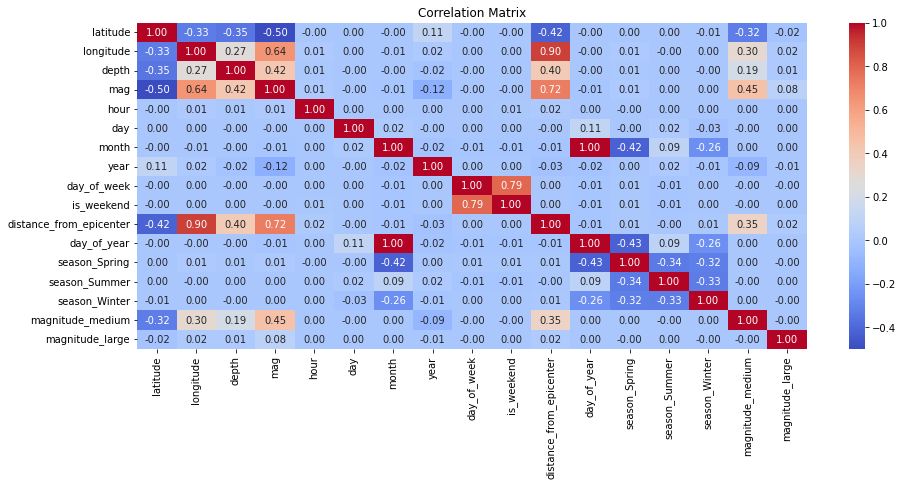

In [75]:
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()